# Onderzoek naar het vergelijken van teksten met behulp van een computer

## Inleiding

Toen Spinoza in 1670 zijn 'Theologisch-politiek traktaat' publiceerde, deed hij dat in het Latijn. Publicatie van vertalingen hield hij actief tegen, omdat hij bang was dat dit kon leiden tot een gevangenisstraf. Zijn ideeën waren zijn tijd namelijk nogal vooruit; ze zouden pas in de verlichting algemener aanvaard worden. In 1674 werd zijn werk dan ook door de overheid verboden. Hierdoor werd er pas in 1693 een eerste vertaling gepubliceerd. In 1694 volgde een tweede en er is een derde ongedateerde handgeschreven vertaling gevonden. In dit onderzoek zijn de vertalingen ui 1693 en 1694 vergeleken. Al deze vertalingen zijn natuurlijk verschillend, maar op sommige plekken toch bijna letterlijk hetzelfde. De overeenkomsten tussen de verschillende vertalingen kunnen veel zeggen over de verspreiding van Spinoza's werk in de jaren, waarin het boek eigenlijk verboden was. Omdat het erg tijdrovend en subjectief is om deze overeenkomst met de hand te bepalen, moet een computer gebruikt worden. Maar hoe kan een computer de overeenkomst tussen stukken tekst bepalen? Dat wordt in dit onderzoek aan de hand van het werk van Spinoza onderzocht. Er zijn voor de verschillende stappen in het proces, verschillende manieren bedacht en die zijn getoetst om te bepalen wat het beste werkt.

## Onderzoeksvraag

De onderzoeksvraag is: "Hoe kan een computer de overeenkomst tussen stukken tekst bepalen?"

Om deze vraag te beantwoorden, moeten een aantal deelvragen beantwoord worden. Het is hiervoor belangrijk eerst te begrijpen hoe het algoritme er in grote lijnen uit zal zien:

Eerst worden de teksten gesplitst in losse delen. Dit kunnen zinnen zijn, maar bijvoorbeeld ook alinea's of hoofdstukken. Vervolgens worden de stukken tekst in beide teksten die een vertaling zijn van hetzelfde aan elkaar gekoppeld. Van al deze koppels wordt dan de overeenkomst bepaald en uitgedrukt in een getal. De overeenkomst wordt dan in een grafiek uitgezet tegen de plaats van het stuk tekst. Een probleem hierbij is dat er in die tijd geen uniforme spelling was. De computer moet verschillend gespelde woorden toch als hetzelfde herkennen.

Dit roept de volgende deelvragen op:
    1. Hoe kunnen de zinnen die een vertaling zijn van hetzelfde correct aan elkaar gekoppeld worden?
    2. Hoe kan de overeenkomst tussen twee stukken tekst bepaald worden en uitgedrukt worden in een getal?
    3. Hoe kan het gebrek aan uniforme spelling worden opgelost?
    4. Bij welke waarde van de overeenkomst ligt de grens tussen 'hetzelfde' en 'verschillend'?
    

De verschillende manieren die ik voor de deelvragen gevonden heb worden in het vervolg toegelicht. Elke manier wordt getoetst aan de hand van het aantal correct gepaarde zinnen in een deel van de tekst. Ook wordt er gekeken of er met de gebruikte manier genoeg onderscheid te maken is tussen verschillende stukken tekst.

## Werkwijze

De uitvoering van het algoritme bestaat uit drie delen: de voorbewerking van de teksten, zodat deze makkelijker voor de computer te interpreteren zijn, de analyse en dus het bepalen van de overeenkomst en ten slotte de visualisatie: het uitzetten van de gegevens in een grafiek.

### Voorbewerking van de teksten

#### Verwijderen van overbodige witregels
Allereerst moeten bij de voorbewerking al aanwezige enters, witregels, etc. verwijderd worden. Op die manier ontstaat een doorlopende tekst, die makkelijker te interpreteren is voor de computer. Hiervoor heb ik de functie 'superstrip()' geschreven.

In [ ]:
def superstrip(path_bron, path_doel):
    import codecs
    file = codecs.open(path_bron, 'r', 'utf-8')
    lines = [line.strip() for line in file]
    text = " ".join(lines)
    file.close()
    file = codecs.open(path_doel, 'w', 'utf-8')
    file.write(text)
    file.close()

#### Opslitsen in verschillende delen

Het opsplitsen in verschillende delen is op verschillende manieren gebeurd. Een eerste manier die ik gebruikt heb is het opsplitsen in zinnen. Aan de hand van interpunctie is de tekst opgesplitst in losse zinnen, gescheiden door een enter. Hiervoor heb ik eerst zelf een functie geschreven ('sentence_split()'); later heb ik een functie geimporteerd van de nltk ('nltk.tokenize.sent_tokenize()'). Ik heb deze functies de tekst uit een document laten nemen om de bewerkte tekst vervolgens in een nieuw document op te slaan met elke zin op een nieuwe regel. De zinnensplitser van de nltk bleek het best te werken.

In [ ]:
def sentence_split(Path_bron, Path_doel):
    superstrip(Path_bron, Path_doel)
    import codecs
    file = codecs.open(Path_doel, 'r', 'utf-8') 
    text = file.read()
    file.close()
    
    #Vanaf hier wordt de tekst langs punten, vraagtekens en uitroeptekens gevolgd door een spatie gesplitst.
    zinnen = text.split('. ')
    
    text = '.\n'.join(zinnen)
    
    zinnen = text.split('! ')
    
    text = '!\n'.join(zinnen)
    
    zinnen = text.split('? ')
    
    text = '?\n'.join(zinnen)
    
    zinnen = text.split('\n')
    
    #Hier wordt gecorrigeerd voor het feit dat een zin niet met een kleine letter of met een haakje mag beginnen.
    for zin in zinnen:
        if len(zin) > 0:
            if zin[0].islower():
                zinnen[zinnen.index(zin)-1] += ' ' + zin
                zinnen.remove(zin)
            elif zin[0] == ')':
                zinnen[zinnen.index(zin)-1] += ' ' + zin
                zinnen.remove(zin)
            
    #Hier wordt het splitsen langs afkortingen die gevolgd worden door een naam ongedaan gemaakt.
    for zin in zinnen:
        if len(zin) > 3:
            if zin[-3:] == "Mr." or zin[-3:] == "Dr." or zin[-4:] == "Mrs." or zin[-3:] == "Ms.":
                zinnen[zinnen.index(zin)+1] = zin + ' ' +  zinnen[zinnen.index(zin)+1]
                zinnen.remove(zin)
    
    text = '\n'.join(zinnen)
    
    
    file = codecs.open(Path_doel, 'w', 'utf-8') 
    file.write(text)
    file.close()
    
    #Vanaf hier wordt het hele algoritme nog een keer uitgevoerd, omdat bij het splitsen in zinnen weer ongewenste witregels ontstonden.
    superstrip(Path_doel, Path_doel)
    
    import codecs
    file = codecs.open(Path_doel, 'r', 'utf-8') 
    text = file.read()
    file.close()
    
    zinnen = text.split('. ')
    
    text = '.\n'.join(zinnen)
    
    zinnen = text.split('! ')
    
    text = '!\n'.join(zinnen)
    
    zinnen = text.split('? ')
    
    text = '?\n'.join(zinnen)
    
    zinnen = text.split('\n')
    
    for zin in zinnen:
        if len(zin) > 0:
            if zin[0].islower():
                zinnen[zinnen.index(zin)-1] += ' ' + zin
                zinnen.remove(zin)
    
    for zin in zinnen:
        if len(zin) > 3:
            if zin[-3:] == "Mr." or zin[-3:] == "Dr." or zin[-4:] == "Mrs." or zin[-3:] == "Ms.":
                zinnen[zinnen.index(zin)+1] = zin + ' ' +  zinnen[zinnen.index(zin)+1]
                zinnen.remove(zin)
    
    text = '\n'.join(zinnen)
    
    
    file = codecs.open(Path_doel, 'w', 'utf-8') 
    file.write(text)
    file.close()
    
    superstrip(Path_doel, Path_doel)
    
    import codecs
    file = codecs.open(Path_doel, 'r', 'utf-8') 
    text = file.read()
    file.close()
    
    zinnen = text.split('. ')
    
    text = '.\n'.join(zinnen)
    
    zinnen = text.split('! ')
    
    text = '!\n'.join(zinnen)
    
    zinnen = text.split('? ')
    
    text = '?\n'.join(zinnen)
    
    zinnen = text.split('\n')
    
    for zin in zinnen:
        if len(zin) > 0:
            if zin[0].islower():
                zinnen[zinnen.index(zin)-1] += ' ' + zin
                zinnen.remove(zin)
    
    for zin in zinnen:
        if len(zin) > 3:
            if zin[-3:] == "Mr." or zin[-3:] == "Dr." or zin[-4:] == "Mrs." or zin[-3:] == "Ms.":
                zinnen[zinnen.index(zin)+1] = zin + ' ' +  zinnen[zinnen.index(zin)+1]
                zinnen.remove(zin)
    
    text = '\n'.join(zinnen)
    
    
    file = codecs.open(Path_doel, 'w', 'utf-8') 
    file.write(text)
    file.close()
    
def nltktokenize(path_bron, path_doel):
    from nltk.tokenize import sent_tokenize
    import codecs
    
    #Eerst worden weer de witregels verwijderd.
    superstrip(path_bron, path_bron)
    superstrip(path_bron, path_bron)
    
    #Vanaf hier wordt de tekst in zinnen opgesplitst.
    file = codecs.open(path_bron, 'r', 'utf-8')
    text = file.read()
    file.close()
    text = sent_tokenize(text, language='dutch')
    text = '\n'.join(text)
    file = codecs.open(path_doel, 'w', 'utf-8')
    file.write(text)
    file.close()
    





#### Overbodige tekens en hoofdletters verwijderen
Bij het interpreteren van de tekst gaat het alleen om de woorden. Zodra de teksten dus gesplitst zijn in zinnen, moet alle interpunctie verwijderd worden. Om de teksten goed te vergelijken moet het algoritme niet hoofdlettergevoelig zijn. Hierom heb ik alle hoofdletters in de tekst geconverteerd naar kleine letters.

In de 17e eeuw was er nog geen uniforme Nederlandse spelling. Anders gespelde woorden moet de computer echter wel als hetzelfde herkennen. Bij bestudering van de teksten valt op dat de verschillen in spelling vaak verschillen in het gebruik van klinkers zijn. Ook het gebruik van de letters d, t, s, z en j verschilt erg. Deze letters gecombineerd met de klinkers zijn dus blijkbaar niet kenmerkend voor een woord. Ik heb het algoritme daarom al deze letters uit de tekst laten verwijderen.

Ik heb hier geen losse functie voor geschreven. Het verwijderen van deze tekens is verwerkt in de rest van het algoritme.




### Analyse van de teksten
Bij de analyse moet van verschillende stukken in de tekst de overeenkomst worden bepaald. Er zijn hierbij een paar obstakels. Ten eerste worden er in de teksten sommige zinnen aan elkaar geplakt, of er worden juist nieuwe zinnen toegevoegd. Dit zorgt ervoor dat bijvoorbeeld zin 300 in de ene tekst niet dezelfde betekenis heeft als zin 300 in de andere tekst. De overeenkomst tussen deze twee zinnen bepalen zou zinloos zijn. Voor elke zin in de ene tekst moet dus de qua betekenis equivalente zin in de andere tekst gevonden worden. Ten tweede is de overeenkomst tussen twee zinnen bepalen lastig. Hiervoor heb ik verschillende manieren getest.

#### Bepalen van overeenkomst
Bij het bepalen van de overeenkomst tussen twee stukken tekst heb ik verschillende technieken gebruikt: overeenkomst op basis van lettervoorkomen, overeenkomst op basis van woordoverlap en overeenkomst met tf-idf.

##### Overeenkomst op basis van lettervoorkomen
Bij de overeenkomst op basis van lettervoorkomen wordt gekeken naar het aantal keer dat een letter voorkomt in een stukje tekst. Van beide stukken tekst wordt van elke letter het voorkomen geteld. Vervolgens wordt voor elke letter de absolute waarde van het verschil in voorkomen van die letter in beide teksten berekend. Al deze vershillen worden vervolgens bij elkaar opgeteld. Hoe hoger deze waarde, hoe minder overeenkomst tussen beide zinnen. Langere zinnen hebben echter meer kans op een hogere waarde. Om hiervoor te corrigeren wordt de som van de verschillen gedeeld door de som van het totale aantal letters van beide zinnen. Op deze manier wordt altijd een waarde tussen 0 en 1 verkregen. Het uiteindelijke resultaat is dan 1 minus deze waarde. Op die manier betekent 0 geen overeenkomst en 1 maximale overeenkomst. De functie die ik hiervoor geschreven heb heet 'match_characters()'.

In [ ]:
def countcharacter(string, character):
    count = 0
    for element in string:
        if element == character:
            count+=1
    return count


def match_characters(string1, string2):
    list1 = []
    list2 = []
    verschillen = []
    string1 = string1.lower()
    string2 = string2.lower()
    kenmerkende_letters = ['q', 'w', 'r', 't', 'p', 's', 'd', 'f', 'g', 'h', 'k', 'l', 'z', 'x', 'c', 'v', 'b', 'n', 'm']
    for letter in kenmerkende_letters:
        list1.append(countcharacter(string1, letter))
        list2.append(countcharacter(string2, letter))
    list_zipped = zip(list1, list2)
    for paar in list_zipped:
        waarde1, waarde2 = paar
        verschillen.append(abs(waarde1 - waarde2))
    for character in string1:
        if character not in kenmerkende_letters:
            string1 = string1.replace(character, "")
    for character in string2:
        if character not in kenmerkende_letters:
            string2 = string2.replace(character, "")
    match = 1-(sum(verschillen)/(len(string1)+len(string2)))
    return match 




##### Overeenkomst op basis van woordoverlap
Bij de overeenkomst op basis van woordoverlap wordt gekeken naar hoeveel woorden in beide zinnen voorkomen. Dit aantal wordt vervolgens ook weer gecorrigeerd naar lengte van de zin door het te delen door het gemiddelde aantal woorden per zin. Ook worden woorden die na het verwijderen van niet-kenmerkende letters nog maar uit één letter bestaan, niet meegerekend bij de woordoverlap. De kans is namelijk groot dat deze woorden zonder niet-kenmerkende letters hetzelfde zijn, maar toch verschillend zijn met deze letters erbij. Bovendien zijn dit vaak korte voeg- of lidwoorden. Deze woorden voegen niet veel toe aan de betekenis van een zin. De functie hiervoor heb ik 'match_wordsintersection()' genoemd.

In [ ]:
def match_wordsintersection(sentence1, sentence2):
    #Hier worden niet-kenmerkende letters en leestekens verwijderd.
    sentence1 = sentence1.lower()
    sentence2 = sentence2.lower()
    kenmerkende_letters_en_spatie = ['q', 'w', 'r', 'p', 'f', 'g', 'h', 'k', 'l', 'x', 'c', 'v', 'b', 'n', 'm', ' ']
    for character in sentence1:
        if character not in kenmerkende_letters_en_spatie:
            sentence1 = sentence1.replace(character, "")
    for character in sentence2:
        if character not in kenmerkende_letters_en_spatie:
            sentence2 = sentence2.replace(character, "")
    
    #Hier wordt de overeenkomst bepaald.
    sentence1 = set(sentence1.split())
    sentence2 = set(sentence2.split())
    if len(sentence1) + len(sentence2) == 0:
        match = 0
    else:
        intersection = sentence1.intersection(sentence2)
        intersection = list(intersection)
        for word in intersection:
            if len(word) < 2:
               intersection.remove(word)
        match = (2*len(intersection)/(len(sentence1) + len(sentence2)))
    return match




##### Overeenkomst met tf-idf
Tf-idf is een techniek om overeenkomst tussen teksten te bepalen die bijvoorbeeld veel gebruikt wordt in zoekmachines om de overeenkomst tussen de tekst op een website en de zoekopdracht te bepalen. De techniek bestaat uit twee delen: Term Frequency (tf) en Inverse Document Frequency (idf).

De term frequency is simpelweg het aantal keer dat een bepaalde term voorkomt in een tekst. Vaak wordt dit nog wel gecorrigeerd naar de lengte van de tekst. In dit onderzoek heb ik het aantal keer dat een term in een tekst voorkomt gedeeld door het het aantal keer dat de term die het meeste voorkomt in die tekst, voorkomt. Op die manier is de tf-waarde altijd een getal tussen 0 en 1. 

De inverse document frequency is er om het belang van bepaalde woorden te bepalen. Wanneer in een tekst bijvoorbeeld heel vaak het woord 'de' voorkomt, kan je nog niets zeggen over de inhoud van die tekst. Juist woorden die normaalgesproken zeldzaam zijn, maar in de tekst wel vaak voorkomen, kunnen veel verraden over de betekenis. De tf-waarde van deze woorden is dus belangrijker. Bij de inverse document frequency wordt daarom in alle te vergelijken tekstfragmenten gezocht naar een term. Het aantal tekstfragmenten waarin de term voorkomt wordt dan geteld. Wanneer een term in meer documenten voorkomt is deze dus minder belangrijk. De idf waarde wordt dan berekend door het totale aantal tekstfragmenten te delen door het aantal tekstfragmenten waarin de term voorkomt en daar de logaritme van te nemen. Vaak wordt bij het aantal tekstfragmenten waarin de term voorkomt nog 1 opgeteld om delen door 0 te voorkomen. Ook in dit onderzoek heb ik dat gedaan.

Voor elke term heeft een tekstfragment dus een tf waarde en een idf waarde. Dit heb ik gebruikt door van alle termen in het zinnen paar de tf-idf waarde in elke zin te bepalen. Zo ontstaat voor elke zin in het zinnenpaar een lijst met waardes. Om de overeenkomsten tussen die lijsten te bepalen heb ik de cosine similarity gebruikt. Hierbij worden beide lijsten als vectoren gezien. De cosine similarity is dan de cosinus van de hoek tussen die twee vectoren. Dit is 1 bij maximale overeenkomst en 0 bij minimale overeenkomst.

Voor de idf waarde heb ik eerst een dictionary gemaakt met de idf waardes van elke term in de tekst.

In [ ]:
def tf(string):
    terms = string.split()
    if len(terms) > 0:
        termsset = set(terms)
        terms_enkel = list(termsset)
        frequencies = []
        tf_dict = {}
        for word in terms_enkel:
            count = 0
            for element in terms:
                if element == word:
                    count += 1
            frequencies.append(count)
            tf_dict[word] = count
        maximum = max(frequencies)
        count = 0
        for word in tf_dict:
            tf_dict[word] = tf_dict[word]/maximum
    else:
        tf_dict = {}
    return tf_dict

def idf(term, text):
    textlist = text.split('\n')
    count = 0
    import math
    for element in textlist:
        words = element.split()
        if term in words:
            count += 1
    idf = math.log(len(textlist)/(count+1))
    return idf

In [ ]:
from functions_spinoza import idf
import codecs

idf_dict = {}

file = codecs.open(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize', 'r', 'utf-8')
text1 = file.read()
file.close()

file = codecs.open(r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize', 'r', 'utf-8')
text2 = file.read()
file.close()

text1 = text1.lower()
text2 = text2.lower()

kenmerkende_letters_en_spatie = ['q', 'w', 'r', 'p', 'f', 'g', 'h', 'k', 'l', 'x', 'c', 'v', 'b', 'n', 'm', ' ', '\n']

for letter in text1:
    if letter not in kenmerkende_letters_en_spatie:
        text1 = text1.replace(letter, '')


for letter in text2:
    if letter not in kenmerkende_letters_en_spatie:
        text2 = text2.replace(letter, '')

text = text1 + ' ' + text2

text1 = text1.split()
text2 = text2.split()
for word in text1:
    if word not in idf_dict:
        idf_dict[word] = idf(word, text)
        
for word in text2:
    if word not in idf_dict:
        idf_dict[word] = idf(word, text)
print(idf_dict)

In [ ]:
def tfidf(string):
    idf_dict = {'vrrn': 3.988532273346742, 'nn': 1.689612425750992, 'mnchn': 2.1726752525396265, 'll': 1.5493716453469455, 'hn': 1.7295678028285866, 'nngn': 5.350729082887572, 'nr': 0.9675126800781015, 'kr': 2.5871090306305513, 'brngn': 4.175743815434888, 'knn': 2.5663059030007878, 'bln': 2.5546098632375966, 'f': 1.3330598883244391, 'l': 0.8325702738891103, 'vrpg': 6.092666427616949, 'wrn': 1.0740629638715167, 'gn': 0.7983570824664514, 'wnglf': 5.099414654606666, 'n': 0.07870680268159642, 'pl': 2.7821234142229248, 'hbbn': 1.2643526903146483, 'mr': 1.0747245583382554, 'wl': 1.6750313654757, 'kwl': 4.025803668143974, 'bnh': 7.70210434005105, 'gbrch': 4.077763407074684, 'ghl': 2.826907016849898, 'nmchg': 6.449341371555682, 'vn': 0.5027994770906425, 'knnn': 1.8132263817181686, 'brn': 4.634051404917432, 'rgn': 4.444007802029567, 'llnlk': 2.5811209887859285, 'chn': 2.447216531430349, 'hp': 5.2597573046818455, 'vr': 1.2091072160886696, 'wrvn': 7.008957159491104, 'rk': 2.602237912226851, 'nkr': 5.450812541444554, 'grn': 3.8954418502807298, 'gvl': 4.013224885937113, 'r': 0.4097671638771723, 'llk': 7.296639231942885, 'rchn': 4.051446098757311, 'gm': 3.0969341540629585, 'mnl': 4.8987439591445145, 'gngn': 4.811732582154885, 'm': 0.6246062864818182, 'vrkm': 5.622662798371214, 'glvn': 3.5912304758777385, 'wfl': 4.78433360796677, 'wr': 1.0988382518370747, 'lchlk': 3.241959926113216, 'hrwr': 6.60349205138294, 'rwr': 6.198026943274775, 'grvn': 4.868890995994834, 'vl': 2.1186080312693507, 'lchlkr': 5.910344870822994, 'h': 0.6416279740512487, 'ngw': 5.562038176554779, 'blf': 3.8954418502807298, 'p': 1.4864967412957744, 'ch': 1.6406474211230329, 'lvn': 2.5091474891608394, 'vrrwn': 5.9973562478126246, 'vrwn': 5.304209067252679, 'pgbln': 6.60349205138294, 'k': 0.8530380574175922, 'nmn': 2.4420081863232106, 'hr': 1.2731916389818525, 'nkng': 3.8309033291431587, 'hwl': 3.4254382210349945, 'glf': 2.918787968679484, 'mn': 1.4667137024463293, 'wn': 0.9336111284024202, 'hf': 1.4013185453878056, 'ng': 1.7913076960105225, 'vrp': 6.785813608176895, 'nrvrn': 7.008957159491104, 'chr': 2.545926740664136, 'wh': 4.352200252776445, 'vln': 4.868890995994834, 'nglk': 5.137154982589513, 'ngn': 1.5973111076360647, 'gvn': 3.2134679703189097, 'gnl': 3.27725770819424, 'gnp': 7.296639231942885, 'lln': 1.5408970183559731, 'krn': 5.099414654606666, 'kn': 1.5873165769110689, 'mglk': 4.369899829875846, 'hrn': 3.4899767421725656, 'wnvglk': 7.70210434005105, 'ngrm': 4.961264316125849, 'pvlgn': 7.70210434005105, 'grng': 6.60349205138294, 'rkn': 3.4185177781904206, 'br': 3.345395513361458, 'hpn': 6.315809978931159, 'rgr': 5.2597573046818455, 'vrn': 1.9014976807593087, 'rwl': 4.545103918900937, 'gbrn': 4.75766536088461, 'wlk': 1.0056875669333598, 'vrgn': 3.196754489345169, 'g': 0.9551048399483067, 'q': 4.524050509703104, 'gchg': 6.785813608176895, 'mk': 4.352200252776445, 'glkkg': 5.910344870822994, 'nglkkg': 6.60349205138294, 'gng': 3.7039036383818513, 'vrg': 2.861862031883475, 'nngml': 7.70210434005105, 'brgn': 5.137154982589513, 'vrkn': 4.13257164356968, 'ngwn': 4.1611450160137355, 'gr': 2.6083541392442875, 'vrwnrng': 5.350729082887572, 'bchwn': 6.198026943274775, 'grmchp': 4.588589030840676, 'ppr': 3.988532273346742, 'gh': 3.446491630232827, 'bglvgh': 7.70210434005105, 'v': 3.1588095577810456, 'fkrg': 7.008957159491104, 'chlmk': 6.60349205138294, 'lv': 1.6359962499473018, 'ffrhnn': 6.449341371555682, 'gbn': 3.7131202934867753, 'w': 0.6945037260991964, 'vrchn': 3.3779716837960705, 'nllk': 7.008957159491104, 'vrklrn': 3.5830671652385773, 'wnrlk': 5.910344870822994, 'gnchlk': 3.142978092564365, 'hlln': 6.198026943274775, 'grk': 4.334808510064575, 'gl': 2.6881412558621194, 'bnrlk': 4.961264316125849, 'llrhn': 6.785813608176895, 'vrggn': 5.622662798371214, 'bgrn': 5.137154982589513, 'vrnmlk': 3.535439116249323, 'gvr': 4.284377656437684, 'hlpn': 6.315809978931159, 'blfn': 5.350729082887572, 'vrwlk': 7.008957159491104, 'rnn': 3.607759777828949, 'glk': 1.3270795202229533, 'hlp': 4.503431222500368, 'nrpn': 7.008957159491104, 'rn': 1.750160551105351, 'wg': 3.2893060467104145, 'mnchlk': 3.3263473183907633, 'bnprghn': 7.70210434005105, 'nblngn': 5.687201319508785, 'rmn': 4.424959607058873, 'knrlk': 5.910344870822994, 'blngn': 5.399519247057004, 'nmghn': 7.70210434005105, 'nwrn': 4.731689874481349, 'fkr': 6.449341371555682, 'kln': 5.756194190995736, 'gchpn': 5.176375695742794, 'vgln': 7.008957159491104, 'nblng': 4.424959607058873, 'ngvng': 7.296639231942885, 'prlh': 7.70210434005105, 'vrrk': 5.350729082887572, 'hlvn': 2.416365755709873, 'nrhn': 4.811732582154885, 'vrvlg': 5.622662798371214, 'bhlvn': 3.810284041940423, 'lr': 2.626930524817223, 'gg': 2.506373562278114, 'bnr': 3.1325613317061096, 'vrbln': 4.387918335378524, 'bgr': 4.175743815434888, 'b': 1.4864967412957744, 'lxnr': 5.622662798371214, 'wrggr': 6.315809978931159, 'bgn': 3.543221256691378, 'gbrkn': 4.334808510064575, 'hfl': 2.8155216946247728, 'cr': 5.137154982589513, 'vf': 3.558969613659517, 'bk': 2.343162351686578, 'pr': 4.483228515182849, 'vrwnnn': 5.622662798371214, 'fl': 6.092666427616949, 'knbr': 6.092666427616949, 'vrchrk': 5.9973562478126246, 'bcrnn': 7.296639231942885, 'fgvlln': 6.449341371555682, 'hm': 2.6175991973883384, 'lg': 4.352200252776445, 'wnn': 5.027955690624521, 'bplk': 6.449341371555682, 'vrnf': 4.868890995994834, 'bgf': 5.562038176554779, 'rnr': 6.198026943274775, 'lcbglvgh': 7.70210434005105, 'vrr': 3.1695048468977935, 'bvl': 3.5277170701554126, 'ffrngn': 6.449341371555682, 'km': 3.929343401956411, 'nrkn': 4.190558901220029, 'bbrngn': 6.449341371555682, 'lf': 1.7295678028285866, 'klrlk': 3.3015013198042324, 'nmnlk': 4.236368437251323, 'gw': 2.1148556816508, 'vrblngn': 6.60349205138294, 'ffrn': 6.449341371555682, 'brf': 3.6767526493159006, 'vrchg': 5.450812541444554, 'nlk': 2.537318366127536, 'wgchlr': 7.008957159491104, 'bnhn': 7.296639231942885, 'gmn': 2.391364453504456, 'vlk': 2.47904945800356, 'ghrch': 6.315809978931159, 'knngn': 3.47527059478287, 'vrchrkklk': 7.70210434005105, 'phn': 5.399519247057004, 'gnch': 3.142978092564365, 'vlg': 3.0339593549015698, 'nrwrpn': 5.350729082887572, 'ggn': 2.7640397387896294, 'vrwr': 4.463425887886669, 'nkbl': 5.063047010435791, 'nbng': 6.315809978931159, 'rfn': 5.910344870822994, 'nnngh': 6.785813608176895, 'brg': 4.175743815434888, 'rf': 4.3177140767052755, 'krchg': 6.785813608176895, 'wrlk': 3.4048189338322588, 'rngn': 5.830302163149458, 'mkn': 3.4899767421725656, 'vlng': 6.092666427616949, 'blvn': 3.722422686149089, 'llng': 6.092666427616949, 'lng': 3.253587964108335, 'chp': 6.092666427616949, 'bhgn': 6.315809978931159, 'nw': 3.332656487584028, 'nnvgh': 7.70210434005105, 'brrn': 5.2597573046818455, 'rlgn': 5.063047010435791, 'blk': 3.20786571477024, 'ngkn': 4.8987439591445145, 'krchgr': 6.315809978931159, 'mng': 5.622662798371214, 'bwgn': 4.444007802029567, 'nbn': 5.063047010435791, 'vrwrpn': 4.839903459121581, 'glch': 4.961264316125849, 'vrvlkn': 6.785813608176895, 'nrgh': 5.9973562478126246, 'vlch': 3.862652027457739, 'rbwng': 7.008957159491104, 'prnkn': 7.008957159491104, 'gwchgr': 7.296639231942885, 'blng': 5.562038176554779, 'ghn': 3.0433933871349286, 'rbgh': 5.9973562478126246, 'glkkglk': 7.008957159491104, 'gvlln': 5.099414654606666, 'wrm': 3.7702787073267237, 'ngrlf': 6.785813608176895, 'wrnn': 6.60349205138294, 'bn': 2.5517071035796355, 'rl': 3.2832637322544516, 'vrrl': 4.78433360796677, 'wfln': 4.406267474046721, 'ln': 2.5401795984085678, 'vrbrgnh': 5.622662798371214, 'nhfg': 7.008957159491104, 'brng': 4.731689874481349, 'wrhn': 4.961264316125849, 'nm': 3.259453083560733, 'vrchwn': 7.296639231942885, 'nbrh': 5.350729082887572, 'vrh': 3.3076551853786107, 'chnlk': 6.60349205138294, 'bl': 2.91045458712034, 'rm': 2.826907016849898, 'bch': 5.137154982589513, 'nch': 2.1988073928164744, 'rmpplkr': 7.70210434005105, 'ngvngn': 6.315809978931159, 'vrrln': 4.369899829875846, 'vrwk': 6.785813608176895, 'bchwg': 6.092666427616949, 'gvln': 2.9399304052532935, 'chlmkkn': 6.315809978931159, 'mrf': 5.756194190995736, 'gbr': 3.7702787073267237, 'vrgr': 5.2597573046818455, 'nvlgr': 5.504879762714831, 'wln': 4.025803668143974, 'wrh': 3.841374629010454, 'gnrvr': 6.785813608176895, 'pgffr': 7.296639231942885, 'vlgn': 2.746277282449789, 'rch': 2.1129847737149885, 'hrchpp': 2.639509307024083, 'grf': 5.910344870822994, 'gchlln': 6.315809978931159, 'vrnrn': 4.7063720664970585, 'vlkm': 6.198026943274775, 'rln': 3.512449598024624, 'wrr': 6.449341371555682, 'hb': 3.1019466958865025, 'gch': 2.8737906027487488, 'nngnm': 6.785813608176895, 'bhng': 6.198026943274775, 'gvrchgh': 3.8309033291431587, 'bvn': 2.857917253592458, 'wch': 4.236368437251323, 'gnmn': 3.906615150878855, 'vrnm': 4.545103918900937, 'vrhnlng': 6.092666427616949, 'prn': 3.976410912814397, 'blkn': 4.78433360796677, 'mrn': 3.722422686149089, 'pprmchn': 4.5666101241219, 'nbchm': 6.60349205138294, 'blgh': 7.296639231942885, 'pgn': 4.334808510064575, 'rkkn': 3.906615150878855, 'hnn': 3.685721319298661, 'vrvlln': 5.622662798371214, 'rnng': 4.236368437251323, 'vrhnl': 6.315809978931159, 'wng': 3.1588095577810456, 'chrvn': 4.503431222500368, 'ngrngn': 7.70210434005105, 'nwn': 4.424959607058873, 'vrwnr': 4.994054138948839, 'chrlk': 5.399519247057004, 'blchp': 5.910344870822994, 'bwngmh': 7.296639231942885, 'nbllkh': 6.785813608176895, 'lk': 3.7702787073267237, 'mlknr': 5.2597573046818455, 'rr': 3.884392014094145, 'vnchp': 7.008957159491104, 'vrgnm': 7.008957159491104, 'hnghn': 7.70210434005105, 'gkn': 4.463425887886669, 'gkmn': 4.463425887886669, 'chrn': 5.622662798371214, 'klng': 7.70210434005105, 'lgchmn': 6.449341371555682, 'krk': 4.839903459121581, 'gwn': 3.4048189338322588, 'gnn': 2.649048330070842, 'gwfl': 6.315809978931159, 'gprn': 5.137154982589513, 'gmnlk': 4.483228515182849, 'bnngn': 6.315809978931159, 'wrghn': 5.2597573046818455, 'lfr': 6.092666427616949, 'mpn': 5.910344870822994, 'gnbwngn': 7.70210434005105, 'hg': 3.0820455415692076, 'mbrk': 7.008957159491104, 'grp': 7.008957159491104, 'krg': 7.296639231942885, 'hlg': 3.2893060467104145, 'bnn': 4.064518180324664, 'plnn': 7.008957159491104, 'vrnr': 4.8987439591445145, 'grgh': 6.198026943274775, 'rvgn': 4.611061886692734, 'chwbrg': 7.70210434005105, 'krklk': 7.008957159491104, 'lrr': 4.8987439591445145, 'bgrg': 6.785813608176895, 'vrk': 5.099414654606666, 'nrwn': 3.8954418502807298, 'vrchlln': 4.994054138948839, 'pnlk': 4.681679453906687, 'brffn': 5.304209067252679, 'gvlg': 3.7412911704534717, 'wrlggn': 6.315809978931159, 'vrkmn': 5.176375695742794, 'wnr': 4.175743815434888, 'gblvn': 5.099414654606666, 'rlk': 4.077763407074684, 'lchglvgh': 7.008957159491104, 'hng': 4.064518180324664, 'nrlk': 2.6881412558621194, 'ngkrk': 5.622662798371214, 'gbrk': 3.5669377833086937, 'nrch': 4.013224885937113, 'vrch': 3.3015013198042324, 'gvnn': 3.3648135992185595, 'chnn': 3.862652027457739, 'lch': 3.0386652459389825, 'blchn': 6.449341371555682, 'nrfflk': 7.70210434005105, 'vrbrgnhn': 5.2597573046818455, 'brvn': 3.8954418502807298, 'vrkr': 4.5666101241219, 'vnk': 7.70210434005105, 'vrwnlk': 7.296639231942885, 'lpn': 6.198026943274775, 'lrn': 3.3913052146655356, 'vrchlkr': 7.70210434005105, 'ngnl': 5.304209067252679, 'nrn': 2.9528338100892015, 'mnn': 4.175743815434888, 'vnlk': 6.60349205138294, 'vrvlgn': 5.504879762714831, 'rlvr': 4.839903459121581, 'wlvrn': 6.092666427616949, 'lrng': 4.369899829875846, 'nrwng': 5.217197690263049, 'bkn': 2.366973000380297, 'chrf': 2.0016607666603634, 'vrwnrn': 5.063047010435791, 'glr': 3.722422686149089, 'plnch': 7.70210434005105, 'rlch': 6.315809978931159, 'bpglngn': 6.60349205138294, 'gchk': 4.051446098757311, 'grkn': 5.2597573046818455, 'gwl': 4.611061886692734, 'prphn': 2.819302417464679, 'prl': 7.70210434005105, 'klrh': 6.315809978931159, 'glkh': 5.217197690263049, 'ghmnn': 7.008957159491104, 'grnv': 5.217197690263049, 'nrlln': 5.399519247057004, 'wrchg': 5.099414654606666, 'rng': 5.137154982589513, 'nrk': 5.756194190995736, 'rgl': 4.611061886692734, 'chrfr': 5.176375695742794, 'hl': 4.961264316125849, 'vrrng': 6.785813608176895, 'vrwg': 7.296639231942885, 'nmlk': 2.345518065379037, 'glh': 5.099414654606666, 'vrm': 4.025803668143974, 'vrchln': 5.099414654606666, 'lrkkn': 4.2681171355659036, 'wbgrgn': 5.450812541444554, 'rh': 5.622662798371214, 'bwgng': 5.687201319508785, 'gmrn': 4.839903459121581, 'bmrk': 5.450812541444554, 'wrch': 5.910344870822994, 'prrghn': 6.785813608176895, 'vrvln': 7.296639231942885, 'vrqmn': 7.296639231942885, 'vrhln': 4.284377656437684, 'prch': 5.027955690624521, 'bvgn': 4.524050509703104, 'vrkrn': 4.444007802029567, 'lvr': 3.5277170701554126, 'ml': 3.2653528056879217, 'prph': 3.3913052146655356, 'gpnbr': 3.0433933871349286, 'ngnm': 5.687201319508785, 'gchn': 3.3076551853786107, 'bkmn': 5.099414654606666, 'bpln': 5.027955690624521, 'chbrh': 4.205596778584569, 'gwch': 5.2597573046818455, 'bhrn': 4.75766536088461, 'hbrn': 3.247757043797542, 'vrkrnn': 6.785813608176895, 'gnm': 3.3015013198042324, 'wrl': 4.75766536088461, 'vlglk': 5.756194190995736, 'gmk': 3.810284041940423, 'bnrrk': 7.70210434005105, 'wlln': 3.0016239742586333, 'lgmn': 3.4607775874803033, 'pln': 2.9146125972690036, 'wnrn': 3.6947711548185787, 'wnlkh': 4.868890995994834, 'vrngh': 4.961264316125849, 'krlkr': 7.70210434005105, 'klrlkr': 5.217197690263049, 'nrchlk': 5.622662798371214, 'rkklk': 3.9409042243574874, 'qm': 5.687201319508785, 'nvg': 4.731689874481349, 'bvg': 3.9526002641206786, 'vlkmnlk': 5.176375695742794, 'wbgr': 4.657581902327626, 'vrklr': 3.862652027457739, 'vrblfln': 6.198026943274775, 'wgh': 5.137154982589513, 'bmn': 5.217197690263049, 'nb': 5.687201319508785, 'nkl': 4.731689874481349, 'bvng': 3.929343401956411, 'ghrmn': 3.722422686149089, 'grchgh': 4.091186427406825, 'ffnn': 5.830302163149458, 'bvngn': 5.504879762714831, 'gnr': 4.8987439591445145, 'vrkngn': 4.961264316125849, 'gnrvng': 7.296639231942885, 'nnmn': 5.099414654606666, 'grnn': 4.334808510064575, 'vrwrp': 6.198026943274775, 'ghrmh': 3.8309033291431587, 'mln': 4.205596778584569, 'nrchn': 4.7063720664970585, 'nmg': 6.092666427616949, 'bhf': 4.868890995994834, 'vrgng': 6.60349205138294, 'vrhl': 3.2022946697207844, 'mngvg': 6.785813608176895, 'mch': 2.9063137944543085, 'mnng': 3.504902392389241, 'wrkn': 3.7039036383818513, 'mg': 4.634051404917432, 'gvrchg': 4.78433360796677, 'vgn': 4.352200252776445, 'gchl': 6.60349205138294, 'bhn': 3.6416613295046303, 'bhr': 4.7063720664970585, 'gmnr': 6.449341371555682, 'wchgnmn': 5.504879762714831, 'vrgf': 4.961264316125849, 'nklk': 3.057713440909677, 'bchrmn': 5.350729082887572, 'vrggvn': 5.304209067252679, 'pprhrchpp': 7.296639231942885, 'vrmgn': 4.104792079462604, 'bchrmr': 6.198026943274775, 'nrvgn': 7.70210434005105, 'mnch': 3.976410912814397, 'fgnmn': 6.60349205138294, 'lwgn': 5.910344870822994, 'bngn': 6.449341371555682, 'ngmrk': 4.3177140767052755, 'brlk': 6.092666427616949, 'bchrf': 5.830302163149458, 'bgnnn': 4.657581902327626, 'vrb': 5.027955690624521, 'wrg': 5.304209067252679, 'vrklrr': 5.217197690263049, 'brgrlk': 4.7063720664970585, 'grchg': 5.9973562478126246, 'ngrchg': 6.785813608176895, 'ck': 7.70210434005105, 'mgn': 4.175743815434888, 'bwrn': 4.3177140767052755, 'wgrg': 6.60349205138294, 'gf': 4.077763407074684, 'vrrw': 6.60349205138294, 'vrrfflkh': 5.756194190995736, 'ngh': 4.424959607058873, 'nh': 5.027955690624521, 'wrk': 3.851956738340991, 'mrr': 4.929515617811268, 'nnrh': 5.756194190995736, 'bnrg': 7.70210434005105, 'ngnmn': 4.013224885937113, 'gv': 4.588589030840676, 'nmglk': 5.2597573046818455, 'nvgh': 5.137154982589513, 'hrnkkgh': 5.350729082887572, 'vrvr': 6.60349205138294, 'hrchn': 4.657581902327626, 'lggn': 3.8734629435619548, 'vrkrlk': 6.785813608176895, 'vrl': 3.7801310037697355, 'hnrlk': 7.008957159491104, 'vrmgr': 7.70210434005105, 'wbgrg': 5.450812541444554, 'rnrn': 5.027955690624521, 'gglrh': 4.731689874481349, 'mchn': 3.731812426498928, 'gnk': 5.830302163149458, 'vrmnn': 4.839903459121581, 'vrln': 3.7605225323813594, 'chlk': 5.562038176554779, 'rg': 3.884392014094145, 'grgn': 6.315809978931159, 'vrnkmn': 5.830302163149458, 'hfln': 5.830302163149458, 'rpng': 5.450812541444554, 'prphch': 4.483228515182849, 'krkplchn': 5.176375695742794, 'ngl': 4.503431222500368, 'gchnn': 4.051446098757311, 'klk': 6.60349205138294, 'lggng': 4.8987439591445145, 'vrklrng': 5.027955690624521, 'rchrn': 4.994054138948839, 'hnchrfn': 6.785813608176895, 'chrvr': 3.574969955005958, 'glg': 4.634051404917432, 'knknngn': 5.562038176554779, 'hbrch': 4.3177140767052755, 'fchrfn': 5.450812541444554, 'lngn': 4.284377656437684, 'vrbn': 3.722422686149089, 'gchrvn': 2.8422919356893774, 'bnng': 5.137154982589513, 'wlf': 5.063047010435791, 'hnchrf': 5.910344870822994, 'bgrp': 4.352200252776445, 'nbrvn': 5.910344870822994, 'nrw': 4.681679453906687, 'nrgn': 4.463425887886669, 'nvlgn': 5.350729082887572, 'glvgn': 5.399519247057004, 'bpl': 3.9179147061327884, 'fgchn': 5.176375695742794, 'vfn': 5.622662798371214, 'grnvn': 5.063047010435791, 'vnn': 3.722422686149089, 'pprmch': 4.75766536088461, 'vrgvn': 5.687201319508785, 'kng': 6.60349205138294, 'lrngn': 4.8987439591445145, 'ngnn': 7.296639231942885, 'fnngn': 7.008957159491104, 'grlf': 4.483228515182849, 'hgn': 4.2208642507153575, 'rchnng': 6.449341371555682, 'hlgn': 6.315809978931159, 'gglr': 6.092666427616949, 'pnbrng': 3.9179147061327884, 'pnbrngn': 4.994054138948839, 'mhln': 4.839903459121581, 'lggr': 5.027955690624521, 'phr': 5.622662798371214, 'brr': 4.731689874481349, 'prkn': 3.0433933871349286, 'wrnm': 7.008957159491104, 'hnln': 4.352200252776445, 'hrvn': 7.296639231942885, 'wlkr': 3.976410912814397, 'ggvn': 3.7605225323813594, 'bplng': 5.9973562478126246, 'hngn': 5.687201319508785, 'gmnvlk': 6.785813608176895, 'prk': 3.5912304758777385, 'gln': 3.5200541974098436, 'lchg': 6.315809978931159, 'vrchl': 4.839903459121581, 'pch': 3.504902392389241, 'krh': 4.387918335378524, 'nl': 4.064518180324664, 'wk': 5.910344870822994, 'lgchm': 5.622662798371214, 'mwng': 7.296639231942885, 'wnchp': 4.731689874481349, 'nchn': 3.1222519620472484, 'vrplnr': 7.296639231942885, 'bv': 4.334808510064575, 'vrwrplk': 7.70210434005105, 'vrmn': 4.051446098757311, 'vrlln': 6.449341371555682, 'nrchnlk': 7.70210434005105, 'vrrfflk': 6.315809978931159, 'bf': 6.785813608176895, 'vrnkm': 5.217197690263049, 'bprf': 5.910344870822994, 'gmrk': 4.190558901220029, 'brlkr': 5.622662798371214, 'bgchrf': 7.70210434005105, 'vrglvr': 5.137154982589513, 'vrgln': 5.687201319508785, 'ngln': 5.027955690624521, 'vrwrn': 6.449341371555682, 'rglk': 4.483228515182849, 'vrgl': 5.910344870822994, 'nmrkn': 5.063047010435791, 'mlrkn': 7.296639231942885, 'gwg': 5.562038176554779, 'glkmn': 7.70210434005105, 'vrbl': 3.62456689614533, 'kphnl': 7.008957159491104, 'gwnnn': 7.296639231942885, 'nkn': 4.387918335378524, 'gprkn': 3.976410912814397, 'bvnnrlk': 5.450812541444554, 'mnghn': 5.137154982589513, 'rlpn': 6.449341371555682, 'nblg': 6.785813608176895, 'vrblng': 5.687201319508785, 'wkn': 5.504879762714831, 'vrgchrvn': 5.099414654606666, 'kl': 6.198026943274775, 'chrbnn': 7.296639231942885, 'krlk': 4.334808510064575, 'lkn': 7.008957159491104, 'rp': 5.2597573046818455, 'vrchnn': 5.910344870822994, 'vrchnng': 6.785813608176895, 'ghr': 4.7063720664970585, 'gwngn': 4.1611450160137355, 'nbllk': 6.198026943274775, 'vrglkr': 7.70210434005105, 'ngbl': 6.092666427616949, 'rml': 6.315809978931159, 'grpn': 5.176375695742794, 'bmlch': 6.449341371555682, 'wkkr': 6.449341371555682, 'lp': 6.315809978931159, 'bqm': 6.092666427616949, 'nbln': 5.217197690263049, 'bgrpn': 3.271287541207736, 'bchrvn': 4.3177140767052755, 'nml': 5.2597573046818455, 'ngch': 5.622662798371214, 'bmlng': 6.785813608176895, 'lknr': 6.785813608176895, 'kmn': 3.5200541974098436, 'wrgh': 4.634051404917432, 'fhngn': 5.830302163149458, 'wnh': 5.399519247057004, 'vrvrm': 6.60349205138294, 'gp': 5.063047010435791, 'vrglkng': 5.910344870822994, 'chpl': 7.296639231942885, 'lppn': 6.449341371555682, 'grngn': 6.785813608176895, 'gpr': 7.008957159491104, 'vlkmlk': 4.811732582154885, 'hml': 5.099414654606666, 'fgl': 4.961264316125849, 'fnmn': 6.785813608176895, 'nlgchmlk': 7.008957159491104, 'pn': 4.483228515182849, 'vrnn': 4.75766536088461, 'chl': 4.352200252776445, 'vrvrn': 6.198026943274775, 'chrnkn': 6.785813608176895, 'blm': 5.910344870822994, 'mmn': 4.0385426939214035, 'brhm': 5.137154982589513, 'nk': 5.099414654606666, 'blchglk': 7.296639231942885, 'ph': 4.75766536088461, 'vlvr': 7.008957159491104, 'cpl': 3.884392014094145, 'vrrg': 4.731689874481349, 'vlgh': 5.027955690624521, 'bm': 5.562038176554779, 'mhpn': 7.70210434005105, 'gmpl': 7.296639231942885, 'gnwrg': 4.868890995994834, 'lnn': 4.868890995994834, 'gngm': 5.099414654606666, 'pnbr': 4.524050509703104, 'vrbrgn': 5.2597573046818455, 'vrnngn': 5.9973562478126246, 'nchw': 7.70210434005105, 'mgl': 6.60349205138294, 'gnlk': 4.657581902327626, 'ngg': 6.315809978931159, 'lgchmlk': 5.830302163149458, 'vrrfflkr': 6.092666427616949, 'vlmkh': 5.504879762714831, 'lgh': 4.190558901220029, 'krkn': 6.449341371555682, 'gmnchp': 6.092666427616949, 'nfngn': 4.588589030840676, 'bhlp': 6.449341371555682, 'prphrn': 5.176375695742794, 'vlmkr': 6.315809978931159, 'lvngr': 6.60349205138294, 'ngr': 5.304209067252679, 'hbrwch': 4.994054138948839, 'rgh': 6.092666427616949, 'bknn': 4.8987439591445145, 'plm': 4.7063720664970585, 'cxxv': 7.70210434005105, 'gkr': 5.687201319508785, 'krchn': 5.137154982589513, 'krch': 4.025803668143974, 'bqmh': 7.008957159491104, 'bvlkh': 7.296639231942885, 'fhng': 4.657581902327626, 'mnngh': 7.70210434005105, 'lmn': 4.334808510064575, 'wrwr': 6.785813608176895, 'hvgh': 7.70210434005105, 'bgrlkh': 6.449341371555682, 'hrch': 5.504879762714831, 'nnm': 6.785813608176895, 'bwng': 5.830302163149458, 'vrwnh': 7.008957159491104, 'nrglgn': 7.296639231942885, 'mgh': 6.60349205138294, 'wrmgh': 6.785813608176895, 'mlgh': 7.296639231942885, 'hrr': 5.350729082887572, 'lfng': 6.092666427616949, 'bvglk': 7.296639231942885, 'rkh': 7.296639231942885, 'prkr': 5.756194190995736, 'mrkn': 4.051446098757311, 'wnnr': 4.252116794219463, 'wnk': 6.60349205138294, 'hmln': 5.399519247057004, 'wgn': 5.176375695742794, 'wnng': 6.092666427616949, 'gfl': 7.70210434005105, 'nbcnr': 6.198026943274775, 'knch': 5.830302163149458, 'pgrgn': 7.008957159491104, 'mpl': 4.387918335378524, 'nrnr': 7.70210434005105, 'mgkr': 6.785813608176895, 'mkrng': 7.296639231942885, 'gmrr': 7.296639231942885, 'gnkwrg': 6.785813608176895, 'plmn': 6.198026943274775, 'crn': 6.449341371555682, 'bvngwn': 7.70210434005105, 'grh': 4.994054138948839, 'nwr': 4.8987439591445145, 'blkm': 7.70210434005105, 'hln': 5.137154982589513, 'chkn': 6.449341371555682, 'glfn': 5.217197690263049, 'gpn': 4.961264316125849, 'vrwchn': 5.756194190995736, 'gvrlkhn': 6.449341371555682, 'pnn': 5.756194190995736, 'chppng': 4.503431222500368, 'mnnn': 4.731689874481349, 'rvr': 5.910344870822994, 'hrgr': 7.70210434005105, 'vrrf': 5.217197690263049, 'nbcnfr': 7.70210434005105, 'knlk': 7.008957159491104, 'wlkn': 4.424959607058873, 'hv': 5.217197690263049, 'gwlg': 5.756194190995736, 'nvrg': 7.296639231942885, 'vrhvn': 6.449341371555682, 'bll': 7.008957159491104, 'knchn': 7.008957159491104, 'ngknnr': 7.296639231942885, 'rpn': 4.8987439591445145, 'nrnpl': 7.296639231942885, 'vrhgn': 7.296639231942885, 'lvng': 5.756194190995736, 'vrgrn': 5.910344870822994, 'vrnw': 7.008957159491104, 'hlgh': 5.910344870822994, 'vrqm': 7.70210434005105, 'bwr': 4.731689874481349, 'bh': 4.7063720664970585, 'chlrn': 6.785813608176895, 'wkh': 5.399519247057004, 'gngnh': 5.830302163149458, 'brh': 7.008957159491104, 'rfh': 6.60349205138294, 'mnhng': 5.350729082887572, 'nhm': 5.027955690624521, 'vrng': 4.994054138948839, 'ffn': 6.449341371555682, 'ngnlk': 6.198026943274775, 'bnvn': 6.092666427616949, 'gwk': 7.70210434005105, 'gbl': 6.60349205138294, 'nchwng': 6.785813608176895, 'gnwrgh': 6.315809978931159, 'wlgh': 7.008957159491104, 'brmhrrgh': 7.70210434005105, 'brmhrgh': 5.027955690624521, 'hrkrch': 7.296639231942885, 'lfn': 4.75766536088461, 'bvln': 3.929343401956411, 'hrllng': 5.910344870822994, 'nprk': 7.008957159491104, 'gvglkr': 7.296639231942885, 'mrk': 5.2597573046818455, 'prkwn': 5.622662798371214, 'klr': 3.574969955005958, 'vrvl': 5.2597573046818455, 'ngchrvn': 5.562038176554779, 'gvlglk': 5.137154982589513, 'vrmghn': 7.296639231942885, 'chrm': 6.198026943274775, 'bkmmrng': 7.70210434005105, 'vlln': 5.2597573046818455, 'vrklmmn': 7.296639231942885, 'plkn': 7.70210434005105, 'bwn': 3.9409042243574874, 'nkbln': 6.785813608176895, 'bgnln': 4.7063720664970585, 'knghn': 5.504879762714831, 'gbw': 5.830302163149458, 'klrn': 7.296639231942885, 'fln': 4.8987439591445145, 'bkr': 6.449341371555682, 'krgn': 6.449341371555682, 'vrgnmn': 5.176375695742794, 'krchglkr': 7.70210434005105, 'vrhlngn': 5.756194190995736, 'vrvlglk': 6.449341371555682, 'vrrffn': 5.099414654606666, 'hmn': 6.785813608176895, 'klchl': 7.70210434005105, 'brch': 5.687201319508785, 'glrh': 6.449341371555682, 'wf': 7.008957159491104, 'hgr': 6.198026943274775, 'rvrnh': 4.634051404917432, 'mchg': 5.350729082887572, 'mnr': 3.332656487584028, 'vrlk': 5.687201319508785, 'bkrnn': 7.008957159491104, 'mmr': 5.450812541444554, 'gchp': 6.785813608176895, 'chmn': 6.785813608176895, 'gvrlchnng': 7.296639231942885, 'bchlgn': 5.450812541444554, 'ngrnkn': 6.785813608176895, 'glrr': 6.449341371555682, 'rnrng': 6.092666427616949, 'nln': 5.176375695742794, 'klrr': 4.961264316125849, 'hk': 6.315809978931159, 'gnh': 6.092666427616949, 'qmn': 7.008957159491104, 'wkng': 5.504879762714831, 'nvrn': 5.450812541444554, 'bprvn': 7.008957159491104, 'lrlngn': 5.756194190995736, 'mh': 5.063047010435791, 'xxvv': 7.70210434005105, 'chb': 6.449341371555682, 'wflchg': 5.562038176554779, 'prkwr': 6.198026943274775, 'bgl': 7.008957159491104, 'gvrchgn': 7.008957159491104, 'wrkgn': 6.785813608176895, 'bgbrch': 5.399519247057004, 'chbr': 5.622662798371214, 'rchvrgn': 6.315809978931159, 'wrkg': 7.296639231942885, 'gwnlk': 5.9973562478126246, 'grffn': 6.60349205138294, 'bllk': 5.562038176554779, 'bhfn': 6.315809978931159, 'bvlg': 5.830302163149458, 'rlm': 4.8987439591445145, 'vrwng': 4.8987439591445145, 'rgng': 7.70210434005105, 'pg': 4.839903459121581, 'prphr': 6.449341371555682, 'bhfnr': 7.70210434005105, 'rknn': 6.449341371555682, 'nklkh': 4.5666101241219, 'nvgn': 5.137154982589513, 'lghm': 7.70210434005105, 'mhl': 5.756194190995736, 'blgg': 7.296639231942885, 'vrwnnngn': 6.449341371555682, 'mrml': 6.198026943274775, 'rfgg': 7.296639231942885, 'rffngn': 6.785813608176895, 'brmhrg': 5.176375695742794, 'vrnlk': 6.198026943274775, 'grmrg': 7.70210434005105, 'bqmr': 7.296639231942885, 'wlprkn': 6.449341371555682, 'vrwrlk': 5.9973562478126246, 'krgmn': 6.60349205138294, 'krgvrn': 7.296639231942885, 'hvlng': 7.008957159491104, 'knnklk': 5.2597573046818455, 'vrchnh': 5.830302163149458, 'rrkn': 6.785813608176895, 'ngwnn': 7.008957159491104, 'knng': 4.064518180324664, 'wrp': 6.315809978931159, 'vrkng': 4.284377656437684, 'nvrchllg': 7.70210434005105, 'hrm': 5.2597573046818455, 'plg': 6.092666427616949, 'vrhg': 6.449341371555682, 'glchp': 7.008957159491104, 'hwlk': 5.830302163149458, 'vrgrm': 6.092666427616949, 'grm': 6.785813608176895, 'rvg': 7.008957159491104, 'nrlg': 6.315809978931159, 'rgbrn': 6.785813608176895, 'cn': 5.756194190995736, 'wrpnngh': 5.9973562478126246, 'nglg': 7.70210434005105, 'gprphr': 5.504879762714831, 'gvrg': 6.198026943274775, 'vrw': 5.910344870822994, 'pnbrn': 6.092666427616949, 'crnkn': 5.399519247057004, 'wlprknh': 7.008957159491104, 'nchm': 7.296639231942885, 'rw': 4.503431222500368, 'nbchf': 6.60349205138294, 'nkrglk': 7.008957159491104, 'vrglk': 5.756194190995736, 'cpln': 5.756194190995736, 'mlknrn': 5.063047010435791, 'vrwgn': 5.176375695742794, 'bng': 5.622662798371214, 'wlg': 7.70210434005105, 'vrchnngn': 6.315809978931159, 'hrlkh': 6.092666427616949, 'rbbnn': 5.622662798371214, 'vrlvrng': 5.910344870822994, 'rphnn': 7.70210434005105, 'vlgln': 7.008957159491104, 'gkl': 7.296639231942885, 'nnr': 6.60349205138294, 'hnl': 5.504879762714831, 'wnhpn': 5.910344870822994, 'vrmg': 5.622662798371214, 'wchnmn': 5.756194190995736, 'grr': 4.369899829875846, 'bchnkn': 6.785813608176895, 'bpglng': 6.092666427616949, 'prchgh': 6.092666427616949, 'nkrglkr': 6.315809978931159, 'vrbv': 5.9973562478126246, 'vrlng': 5.450812541444554, 'nrrnglk': 7.296639231942885, 'rnm': 6.449341371555682, 'rrk': 6.785813608176895, 'nbwglk': 6.449341371555682, 'vrnrng': 5.687201319508785, 'wbgrgr': 7.296639231942885, 'wrngn': 6.449341371555682, 'lngr': 5.2597573046818455, 'kmm': 7.70210434005105, 'lngrg': 7.008957159491104, 'vlh': 6.092666427616949, 'wnchwng': 7.008957159491104, 'vrbrngn': 6.60349205138294, 'chrwr': 7.296639231942885, 'chw': 6.092666427616949, 'bnnn': 5.399519247057004, 'nbchrmlk': 6.785813608176895, 'mngn': 6.449341371555682, 'wknnr': 7.70210434005105, 'mlln': 7.70210434005105, 'mmkrng': 6.785813608176895, 'wrkln': 7.008957159491104, 'nbkn': 5.756194190995736, 'gwrk': 6.092666427616949, 'mwrpng': 7.296639231942885, 'mnchhk': 7.70210434005105, 'vrlgn': 5.9973562478126246, 'gnchppn': 5.450812541444554, 'ggnn': 5.756194190995736, 'hgh': 5.756194190995736, 'nbvln': 6.315809978931159, 'lwn': 6.198026943274775, 'vrbrg': 6.60349205138294, 'vrnchlgn': 7.008957159491104, 'wnln': 7.008957159491104, 'bchmh': 7.008957159491104, 'gnchp': 6.449341371555682, 'wrkmr': 7.70210434005105, 'brw': 5.450812541444554, 'lbn': 7.296639231942885, 'vrlgnwrg': 7.70210434005105, 'wrnr': 7.008957159491104, 'vfg': 7.008957159491104, 'nrln': 7.70210434005105, 'hgnn': 6.449341371555682, 'nvrchlln': 7.008957159491104, 'bvnn': 4.681679453906687, 'wnlk': 5.756194190995736, 'grrn': 6.785813608176895, 'rnbvn': 4.8987439591445145, 'gb': 3.7702787073267237, 'bkln': 6.60349205138294, 'vlkn': 3.7412911704534717, 'prkw': 5.562038176554779, 'nrlng': 5.399519247057004, 'bgnl': 7.008957159491104, 'klmp': 7.296639231942885, 'lnchppn': 5.830302163149458, 'brgng': 7.008957159491104, 'vrchr': 6.60349205138294, 'cb': 5.910344870822994, 'flggn': 7.70210434005105, 'vrvlgng': 6.60349205138294, 'rfl': 6.785813608176895, 'grrnh': 6.449341371555682, 'vgng': 6.785813608176895, 'rnrg': 7.70210434005105, 'hrnn': 6.315809978931159, 'gvrm': 6.60349205138294, 'gngglkh': 6.449341371555682, 'vg': 4.868890995994834, 'rb': 5.830302163149458, 'gngglk': 7.70210434005105, 'glgn': 5.399519247057004, 'gwrn': 4.78433360796677, 'klf': 5.830302163149458, 'ngbn': 5.622662798371214, 'pprwn': 7.70210434005105, 'ngnmr': 6.092666427616949, 'klm': 7.296639231942885, 'vrlp': 6.315809978931159, 'gpnln': 7.70210434005105, 'wnglvghn': 7.296639231942885, 'gpnr': 6.449341371555682, 'fgm': 6.785813608176895, 'wgvr': 5.063047010435791, 'bnkn': 5.756194190995736, 'rgngn': 6.785813608176895, 'vrrrn': 7.70210434005105, 'nrhln': 7.008957159491104, 'knrn': 4.994054138948839, 'rvn': 4.75766536088461, 'nvlchn': 6.60349205138294, 'nglr': 7.008957159491104, 'wrkrn': 6.449341371555682, 'hnlngn': 6.315809978931159, 'bbh': 6.315809978931159, 'rglmg': 6.785813608176895, 'chrfn': 4.994054138948839, 'clnn': 7.70210434005105, 'pprnk': 7.296639231942885, 'vrgffn': 6.785813608176895, 'mnh': 7.296639231942885, 'bkrngn': 7.296639231942885, 'rmnn': 5.027955690624521, 'rchvrgh': 7.008957159491104, 'bchwng': 5.450812541444554, 'ffnng': 5.027955690624521, 'vrmnng': 6.785813608176895, 'grch': 5.099414654606666, 'phrn': 4.7063720664970585, 'nwnh': 5.756194190995736, 'gvg': 4.5666101241219, 'mhx': 7.70210434005105, 'mhxvv': 7.70210434005105, 'hgmg': 6.785813608176895, 'bbrng': 7.296639231942885, 'bchrvnn': 7.70210434005105, 'plln': 6.785813608176895, 'fwkn': 5.910344870822994, 'ngrr': 6.785813608176895, 'hbb': 4.146756278561636, 'nkrg': 6.315809978931159, 'ngrk': 7.296639231942885, 'glklgh': 4.7063720664970585, 'gnng': 7.008957159491104, 'glklgr': 6.785813608176895, 'vrpgr': 7.296639231942885, 'vrmrr': 5.622662798371214, 'glklg': 5.756194190995736, 'glklk': 5.450812541444554, 'vrmrrn': 7.296639231942885, 'bgfgn': 7.296639231942885, 'nknnn': 4.961264316125849, 'vrgkmn': 6.60349205138294, 'vrbnn': 4.3177140767052755, 'gkrn': 6.315809978931159, 'nwng': 4.929515617811268, 'nvrnrlk': 5.217197690263049, 'mnchklng': 6.315809978931159, 'wrkng': 5.304209067252679, 'vrbpl': 6.785813608176895, 'nvrwch': 6.449341371555682, 'bwngn': 5.450812541444554, 'hbblkh': 6.198026943274775, 'vrkrgn': 4.284377656437684, 'rglrch': 5.504879762714831, 'vrkrgng': 7.296639231942885, 'glchn': 6.60349205138294, 'vrgbrch': 6.198026943274775, 'chwn': 5.622662798371214, 'wkkrh': 6.449341371555682, 'krr': 6.092666427616949, 'gllgh': 5.176375695742794, 'mlmg': 6.60349205138294, 'vlgr': 6.092666427616949, 'bngr': 7.008957159491104, 'vrplch': 5.562038176554779, 'vrkrg': 7.296639231942885, 'rlp': 7.296639231942885, 'nkmlngn': 5.063047010435791, 'grg': 5.399519247057004, 'vrbnbrkng': 7.296639231942885, 'nrgng': 5.350729082887572, 'nglgnhn': 7.296639231942885, 'gmkklkh': 7.008957159491104, 'vrngn': 4.868890995994834, 'nv': 7.70210434005105, 'nrhng': 6.449341371555682, 'nghn': 5.562038176554779, 'ngmkkn': 5.9973562478126246, 'gnngn': 7.008957159491104, 'mlchk': 6.449341371555682, 'prr': 4.545103918900937, 'pgrch': 6.092666427616949, 'gwnn': 5.756194190995736, 'nllngn': 7.296639231942885, 'mlch': 6.315809978931159, 'pgng': 6.785813608176895, 'rkwrk': 7.296639231942885, 'hrchrn': 6.315809978931159, 'bg': 4.483228515182849, 'plchghn': 7.296639231942885, 'xxx': 7.70210434005105, 'lnkmg': 7.70210434005105, 'vlchn': 6.785813608176895, 'nnvn': 6.449341371555682, 'mp': 5.504879762714831, 'hnch': 6.198026943274775, 'wrprchng': 6.198026943274775, 'bwnn': 6.449341371555682, 'gpnrn': 5.756194190995736, 'vrlr': 6.60349205138294, 'bvrn': 6.198026943274775, 'nbpllk': 7.296639231942885, 'mbn': 6.785813608176895, 'mb': 6.785813608176895, 'mghl': 7.70210434005105, 'rmml': 7.296639231942885, 'mmnn': 7.296639231942885, 'glgnh': 4.994054138948839, 'vrmr': 5.9973562478126246, 'vrvlk': 6.198026943274775, 'mcgl': 7.70210434005105, 'vrwnchp': 7.296639231942885, 'lrhgn': 7.70210434005105, 'nng': 4.78433360796677, 'lmchg': 6.60349205138294, 'vlmkn': 7.296639231942885, 'nrwgn': 7.70210434005105, 'nfng': 5.910344870822994, 'rchvrg': 4.8987439591445145, 'wgchclr': 7.70210434005105, 'bchlg': 6.785813608176895, 'hvg': 7.70210434005105, 'bnk': 5.910344870822994, 'bvlgn': 5.756194190995736, 'blgchlk': 6.60349205138294, 'wrpnng': 5.399519247057004, 'hrnkkg': 5.562038176554779, 'bwg': 5.910344870822994, 'hlv': 6.449341371555682, 'fwk': 6.092666427616949, 'nrh': 5.9973562478126246, 'vlrfflk': 7.70210434005105, 'hrvr': 6.785813608176895, 'ggrn': 6.315809978931159, 'hngh': 7.296639231942885, 'llr': 5.137154982589513, 'gchrf': 5.687201319508785, 'gnwrpn': 6.60349205138294, 'mnngn': 4.994054138948839, 'vrlrn': 4.8987439591445145, 'vrglkn': 5.830302163149458, 'wlrn': 7.008957159491104, 'wrpnngn': 7.296639231942885, 'fgvllnn': 7.296639231942885, 'gnwr': 6.315809978931159, 'chmh': 7.70210434005105, 'qn': 5.9973562478126246, 'prrbk': 7.296639231942885, 'blchnn': 7.70210434005105, 'pwn': 7.296639231942885, 'ghln': 6.092666427616949, 'ngng': 6.785813608176895, 'vlrklk': 4.5666101241219, 'fvllgn': 7.70210434005105, 'fchn': 5.830302163149458, 'hvrgn': 7.70210434005105, 'glvg': 5.399519247057004, 'wrpbwng': 6.785813608176895, 'pngn': 7.296639231942885, 'knnkrk': 5.176375695742794, 'bllngchp': 6.449341371555682, 'pgnn': 7.70210434005105, 'vrrchn': 6.449341371555682, 'pnrn': 7.296639231942885, 'vrmng': 5.830302163149458, 'ghgn': 5.9973562478126246, 'prgl': 7.296639231942885, 'nwrg': 7.008957159491104, 'vrwkn': 7.296639231942885, 'vrnrlk': 6.449341371555682, 'kf': 6.60349205138294, 'rrn': 5.622662798371214, 'rkmmn': 7.008957159491104, 'nchmh': 7.008957159491104, 'qnn': 7.296639231942885, 'gnprkn': 6.60349205138294, 'nlg': 5.910344870822994, 'nlgn': 6.60349205138294, 'blvng': 7.296639231942885, 'gvnng': 7.008957159491104, 'vrchrvn': 6.092666427616949, 'vlglkr': 7.296639231942885, 'gmkklkr': 6.449341371555682, 'klnr': 6.198026943274775, 'fn': 5.063047010435791, 'bvlgng': 7.296639231942885, 'vrnmk': 7.70210434005105, 'nmrkng': 6.449341371555682, 'chkkn': 5.622662798371214, 'gchkl': 7.008957159491104, 'vlvrn': 6.092666427616949, 'grnpln': 7.296639231942885, 'prng': 7.008957159491104, 'vrchrf': 5.027955690624521, 'nbqm': 7.70210434005105, 'wngn': 4.929515617811268, 'vrchlk': 6.198026943274775, 'gpg': 5.9973562478126246, 'nbr': 5.756194190995736, 'grchvrg': 6.449341371555682, 'vlmk': 5.756194190995736, 'wflng': 7.008957159491104, 'vlmklkr': 7.296639231942885, 'wrkngn': 5.450812541444554, 'wll': 5.063047010435791, 'brk': 6.198026943274775, 'vrmk': 5.9973562478126246, 'chppn': 7.296639231942885, 'vlchlk': 5.350729082887572, 'chrl': 7.296639231942885, 'lw': 7.008957159491104, 'bchrmng': 7.008957159491104, 'bvch': 6.60349205138294, 'lgm': 7.70210434005105, 'vrwgng': 7.008957159491104, 'nmh': 7.296639231942885, 'vrbrng': 6.785813608176895, 'mchlkr': 7.296639231942885, 'nllng': 5.910344870822994, 'vrglng': 6.785813608176895, 'bmnnn': 5.350729082887572, 'rvng': 6.60349205138294, 'wnklbr': 7.296639231942885, 'rhk': 6.785813608176895, 'hrp': 6.449341371555682, 'gnhppn': 7.296639231942885, 'hkn': 7.296639231942885, 'bvgngn': 7.296639231942885, 'nknnngn': 7.296639231942885, 'fggn': 6.60349205138294, 'vlgng': 7.70210434005105, 'vlkmn': 4.463425887886669, 'prchn': 6.198026943274775, 'nbl': 5.450812541444554, 'fgwr': 6.785813608176895, 'vnmg': 7.296639231942885, 'bkl': 6.092666427616949, 'glknn': 7.008957159491104, 'grnlk': 7.296639231942885, 'crnhr': 6.198026943274775, 'chk': 6.198026943274775, 'mmng': 5.217197690263049, 'wllngn': 6.785813608176895, 'qrg': 7.70210434005105, 'vrwllglk': 6.198026943274775, 'lflk': 7.70210434005105, 'vrpllng': 6.60349205138294, 'glkn': 4.961264316125849, 'gvrchgl': 7.70210434005105, 'vrchgh': 5.910344870822994, 'cp': 6.785813608176895, 'rkm': 7.296639231942885, 'vpn': 6.449341371555682, 'glngr': 7.008957159491104, 'bvfgn': 7.296639231942885, 'prchghn': 7.70210434005105, 'ngrn': 6.785813608176895, 'rmll': 7.296639231942885, 'vm': 7.70210434005105, 'chpln': 7.296639231942885, 'vrnchlg': 6.785813608176895, 'lgr': 5.622662798371214, 'nvr': 5.687201319508785, 'bgrlkhn': 6.785813608176895, 'hnnr': 7.296639231942885, 'rff': 5.910344870822994, 'vrnchlgng': 7.008957159491104, 'vrbr': 4.868890995994834, 'fghnl': 7.008957159491104, 'krklchn': 7.70210434005105, 'ngbrn': 7.296639231942885, 'hbrr': 7.70210434005105, 'wrgnmn': 6.60349205138294, 'brkkn': 6.092666427616949, 'gglrn': 6.198026943274775, 'chng': 5.687201319508785, 'vlrk': 5.756194190995736, 'nrg': 5.687201319508785, 'rbr': 7.296639231942885, 'brnffr': 7.296639231942885, 'nffr': 7.296639231942885, 'vlbrngn': 5.9973562478126246, 'ngrkkn': 6.315809978931159, 'lchmlk': 6.092666427616949, 'blnng': 6.785813608176895, 'bbbn': 7.296639231942885, 'vrwnnng': 6.092666427616949, 'lgn': 6.60349205138294, 'vlkr': 7.70210434005105, 'nrvnng': 7.296639231942885, 'vrpl': 6.785813608176895, 'gmnb': 4.300906958388894, 'hnlng': 6.785813608176895, 'nkngh': 7.296639231942885, 'phrnn': 7.296639231942885, 'nhln': 6.785813608176895, 'gvnh': 7.296639231942885, 'vnnn': 7.70210434005105, 'wrnmng': 7.70210434005105, 'vrmkn': 6.785813608176895, 'rffn': 5.622662798371214, 'wrlch': 7.70210434005105, 'ghnl': 5.399519247057004, 'brnkl': 7.008957159491104, 'mm': 5.176375695742794, 'nghl': 6.60349205138294, 'hnhvr': 7.70210434005105, 'grchh': 7.70210434005105, 'bllkh': 5.830302163149458, 'vnglm': 5.9973562478126246, 'chrnn': 5.910344870822994, 'bblnn': 7.296639231942885, 'gvngn': 5.622662798371214, 'gnhn': 7.008957159491104, 'vrglh': 7.70210434005105, 'ffrhn': 7.70210434005105, 'gngh': 7.008957159491104, 'pwkkn': 6.785813608176895, 'gffr': 7.008957159491104, 'gbrklk': 5.910344870822994, 'bvr': 6.315809978931159, 'nwnn': 7.296639231942885, 'nbrkn': 6.198026943274775, 'bvrrn': 6.785813608176895, 'plgn': 5.504879762714831, 'kkn': 6.315809978931159, 'wvn': 7.008957159491104, 'wnchppn': 5.399519247057004, 'hnhfn': 7.70210434005105, 'bgvlg': 6.785813608176895, 'ngbrl': 7.70210434005105, 'nc': 7.008957159491104, 'rrchr': 7.296639231942885, 'gmg': 6.785813608176895, 'grlk': 6.60349205138294, 'gnrg': 5.910344870822994, 'hlrff': 7.70210434005105, 'wnchn': 6.60349205138294, 'grgr': 5.350729082887572, 'nwlgn': 7.296639231942885, 'plch': 5.756194190995736, 'wrnmn': 7.008957159491104, 'bvlr': 7.296639231942885, 'ngvr': 5.562038176554779, 'ghrm': 5.176375695742794, 'rgrng': 3.884392014094145, 'vrmnr': 6.785813608176895, 'pgv': 6.449341371555682, 'bwrlk': 7.296639231942885, 'bmchgn': 7.70210434005105, 'gmnm': 7.296639231942885, 'plmp': 7.70210434005105, 'nrrk': 6.60349205138294, 'rlg': 4.444007802029567, 'nklkr': 7.296639231942885, 'krgln': 6.449341371555682, 'glkkn': 7.296639231942885, 'vrchrkkn': 7.296639231942885, 'chlg': 5.217197690263049, 'mchch': 7.70210434005105, 'wlgvlln': 6.785813608176895, 'nchg': 7.296639231942885, 'nlkh': 7.70210434005105, 'glkch': 6.315809978931159, 'mgklr': 7.70210434005105, 'vnml': 7.296639231942885, 'chrnm': 7.296639231942885, 'wchn': 6.092666427616949, 'lwr': 4.731689874481349, 'nrlnr': 6.60349205138294, 'mchpp': 7.296639231942885, 'nhn': 5.687201319508785, 'lchr': 5.687201319508785, 'vrhnln': 5.830302163149458, 'nnn': 5.504879762714831, 'nrvnn': 7.008957159491104, 'mnknpng': 7.296639231942885, 'mchgh': 7.296639231942885, 'rrngn': 7.008957159491104, 'mnknpn': 7.70210434005105, 'bplngn': 5.910344870822994, 'mnchlkn': 6.785813608176895, 'chkln': 6.60349205138294, 'glrn': 5.756194190995736, 'png': 7.70210434005105, 'fch': 6.785813608176895, 'vrlchn': 6.785813608176895, 'glfr': 7.70210434005105, 'nkk': 7.296639231942885, 'fnng': 7.70210434005105, 'nmnchlk': 7.296639231942885, 'lchch': 7.008957159491104, 'nkhk': 7.70210434005105, 'blchrvn': 7.70210434005105, 'fgnn': 7.70210434005105, 'bvgng': 7.70210434005105, 'bgng': 5.830302163149458, 'bgrppn': 7.70210434005105, 'gpln': 7.70210434005105, 'hchn': 7.70210434005105, 'nprng': 7.70210434005105, 'chphl': 7.296639231942885, 'vrllngn': 6.785813608176895, 'vrgp': 7.70210434005105, 'hlm': 5.830302163149458, 'hrkrngn': 7.70210434005105, 'c': 5.830302163149458, 'vrchf': 7.70210434005105, 'vnvl': 6.785813608176895, 'lcrn': 7.70210434005105, 'bchrvngn': 7.70210434005105, 'rblr': 7.70210434005105, 'nrglk': 6.60349205138294, 'vlbrch': 6.198026943274775, 'rfgnm': 7.296639231942885, 'nwnr': 7.296639231942885, 'rbb': 6.449341371555682, 'kb': 5.830302163149458, 'lhm': 7.296639231942885, 'chrwgn': 7.70210434005105, 'vlrkkn': 7.70210434005105, 'lml': 7.70210434005105, 'nrchrg': 7.70210434005105, 'pmrkng': 6.092666427616949, 'gwr': 7.008957159491104, 'gnchm': 6.60349205138294, 'pnlkr': 7.296639231942885, 'lnkmgh': 7.296639231942885, 'glv': 4.524050509703104, 'chmgh': 7.296639231942885, 'flr': 7.296639231942885, 'lknrn': 7.70210434005105, 'nrgbrch': 6.198026943274775, 'rprnk': 5.910344870822994, 'nchbr': 7.70210434005105, 'pghn': 5.830302163149458, 'vmm': 7.70210434005105, 'rgln': 5.756194190995736, 'bkwm': 6.198026943274775, 'nvrchbr': 6.785813608176895, 'wnch': 6.092666427616949, 'pchlk': 6.60349205138294, 'gnkn': 5.756194190995736, 'rglm': 5.756194190995736, 'nvrwgglk': 7.70210434005105, 'pgpr': 6.092666427616949, 'vgl': 6.785813608176895, 'krchglk': 6.785813608176895, 'gwrch': 7.70210434005105, 'nngh': 7.008957159491104, 'nvrnrlkh': 7.296639231942885, 'ngrwn': 7.70210434005105, 'nrl': 5.399519247057004, 'fbrk': 7.296639231942885, 'mmg': 4.369899829875846, 'vrlgchnng': 7.70210434005105, 'fgwkn': 6.092666427616949, 'bp': 7.296639231942885, 'bknnn': 5.9973562478126246, 'pnr': 7.70210434005105, 'mchgr': 6.785813608176895, 'fgbrkn': 5.830302163149458, 'vrnmn': 5.622662798371214, 'cvv': 7.70210434005105, 'rgnbg': 7.296639231942885, 'wrrlng': 7.70210434005105, 'rppln': 7.296639231942885, 'gplg': 6.198026943274775, 'mhg': 7.70210434005105, 'vrpr': 6.785813608176895, 'prnkhnn': 7.296639231942885, 'wwn': 7.296639231942885, 'wkkn': 7.296639231942885, 'nrlggn': 7.296639231942885, 'blnn': 6.315809978931159, 'hgl': 7.008957159491104, 'gbln': 7.70210434005105, 'mngh': 6.315809978931159, 'chrgln': 7.296639231942885, 'nrngn': 7.296639231942885, 'vrchbrh': 7.008957159491104, 'gchchrvr': 4.681679453906687, 'fchlr': 6.60349205138294, 'vrgrmn': 7.70210434005105, 'krkchng': 7.70210434005105, 'qlk': 6.092666427616949, 'nvglk': 5.9973562478126246, 'vrmngn': 5.830302163149458, 'vrhlr': 7.296639231942885, 'gmkklk': 6.60349205138294, 'bchrvr': 7.008957159491104, 'vrllg': 6.60349205138294, 'vrhlng': 6.449341371555682, 'vrwrrn': 6.315809978931159, 'mrng': 7.70210434005105, 'pgklmmn': 6.60349205138294, 'lnk': 7.008957159491104, 'vlmkhn': 7.296639231942885, 'rngh': 7.70210434005105, 'wlwrn': 7.70210434005105, 'nrlgn': 6.785813608176895, 'bbln': 6.092666427616949, 'wlrnn': 7.296639231942885, 'brnnn': 7.70210434005105, 'vrlf': 6.092666427616949, 'kmnr': 7.70210434005105, 'crlk': 7.70210434005105, 'nchlk': 7.70210434005105, 'vrhr': 7.296639231942885, 'vnrn': 7.70210434005105, 'vrmnk': 6.198026943274775, 'bhrlk': 7.296639231942885, 'bw': 5.687201319508785, 'nknpn': 7.008957159491104, 'vrchbr': 7.008957159491104, 'fgrkkn': 7.008957159491104, 'lhn': 7.296639231942885, 'nlng': 6.785813608176895, 'pmphln': 7.70210434005105, 'mcnr': 6.315809978931159, 'gwkn': 7.70210434005105, 'prnn': 6.092666427616949, 'chrflk': 6.60349205138294, 'ghlk': 5.910344870822994, 'vrkpn': 7.296639231942885, 'bkmmr': 5.9973562478126246, 'vrrkn': 6.198026943274775, 'rklh': 6.785813608176895, 'fwln': 7.008957159491104, 'rkl': 7.008957159491104, 'nwghn': 7.70210434005105, 'chnr': 7.70210434005105, 'gchrm': 7.70210434005105, 'vrbrn': 5.504879762714831, 'hlgchng': 7.70210434005105, 'fghn': 7.70210434005105, 'brnn': 7.296639231942885, 'chln': 6.449341371555682, 'vrwrln': 7.296639231942885, 'vrprkn': 7.296639231942885, 'vrwrrng': 7.70210434005105, 'rkllk': 7.008957159491104, 'gvlgn': 6.449341371555682, 'brpn': 7.008957159491104, 'lrk': 6.198026943274775, 'rhln': 7.70210434005105, 'pprn': 6.449341371555682, 'vrnng': 7.008957159491104, 'mnhngl': 7.70210434005105, 'grkkn': 4.7063720664970585, 'ggrnv': 7.296639231942885, 'vrngnmn': 7.008957159491104, 'rnvrng': 5.622662798371214, 'lrlk': 5.687201319508785, 'vrnqmn': 7.70210434005105, 'lnprklk': 5.910344870822994, 'nkm': 7.70210434005105, 'vrpllngvn': 7.70210434005105, 'bghn': 7.296639231942885, 'ggr': 6.785813608176895, 'glfwrgh': 4.839903459121581, 'vrvlchn': 7.008957159491104, 'vrrvn': 5.099414654606666, 'mlgn': 6.198026943274775, 'nglpn': 6.198026943274775, 'rvrn': 5.830302163149458, 'glfwrg': 6.60349205138294, 'nwflbr': 6.785813608176895, 'grglk': 6.449341371555682, 'rppn': 7.70210434005105, 'bvnl': 7.70210434005105, 'gffn': 6.315809978931159, 'nbvl': 7.296639231942885, 'vrwrl': 5.2597573046818455, 'rchr': 4.5666101241219, 'rnnbk': 7.70210434005105, 'vrrkkng': 6.785813608176895, 'vrrgn': 4.444007802029567, 'gnwrglk': 7.296639231942885, 'frn': 5.910344870822994, 'vnr': 7.008957159491104, 'prprn': 7.70210434005105, 'pprprr': 4.7063720664970585, 'rmch': 5.687201319508785, 'nhngr': 6.60349205138294, 'vrhpn': 7.008957159491104, 'ffnr': 7.296639231942885, 'wrbk': 7.296639231942885, 'lrkn': 6.449341371555682, 'rnrkkn': 7.70210434005105, 'vrkrngn': 7.296639231942885, 'pprnkng': 7.70210434005105, 'vrvlgngn': 7.296639231942885, 'vchn': 6.449341371555682, 'rmp': 7.008957159491104, 'bbl': 4.545103918900937, 'nbrk': 6.785813608176895, 'wnhn': 7.70210434005105, 'nbvlk': 7.008957159491104, 'wflchghn': 6.60349205138294, 'wflchgh': 6.785813608176895, 'bc': 7.70210434005105, 'rnngn': 6.785813608176895, 'ghml': 7.296639231942885, 'lph': 7.008957159491104, 'rlrn': 7.70210434005105, 'vlvlg': 7.296639231942885, 'mnvgn': 6.60349205138294, 'vrbrnng': 7.296639231942885, 'wrkwrn': 7.008957159491104, 'bknmkn': 7.296639231942885, 'nvlmk': 6.785813608176895, 'nbpl': 7.70210434005105, 'nrng': 7.008957159491104, 'fglg': 7.70210434005105, 'crlkh': 7.70210434005105, 'wflnngh': 7.70210434005105, 'klnklr': 6.60349205138294, 'klnkn': 7.296639231942885, 'vrklrngn': 6.092666427616949, 'lggngn': 6.092666427616949, 'hngch': 6.315809978931159, 'vrnchln': 7.70210434005105, 'x': 4.369899829875846, 'pnmkr': 7.008957159491104, 'bchlrgn': 7.70210434005105, 'vrlngn': 6.315809978931159, 'klnklrn': 7.296639231942885, 'wrchnlkr': 7.70210434005105, 'bhvn': 5.622662798371214, 'nrnn': 5.217197690263049, 'vrwlng': 7.70210434005105, 'hrbrn': 7.70210434005105, 'vrllng': 7.70210434005105, 'bpglg': 7.008957159491104, 'nmk': 7.70210434005105, 'mkr': 6.785813608176895, 'vlr': 5.9973562478126246, 'bnffn': 6.092666427616949, 'fchrf': 7.296639231942885, 'nglflk': 6.449341371555682, 'nbgrplk': 6.198026943274775, 'bhl': 5.504879762714831, 'vrgh': 5.910344870822994, 'vrhbbn': 7.70210434005105, 'gvlgl': 7.296639231942885, 'ngwpn': 7.70210434005105, 'nrglmg': 7.008957159491104, 'brkn': 5.756194190995736, 'bnw': 7.70210434005105, 'bvlk': 7.008957159491104, 'klrblklk': 5.137154982589513, 'krwh': 7.70210434005105, 'ngnklk': 7.70210434005105, 'pnhrglk': 7.70210434005105, 'chlh': 7.008957159491104, 'nglvgn': 7.008957159491104, 'gprk': 5.687201319508785, 'chrmn': 6.449341371555682, 'chrfrpln': 7.008957159491104, 'vrhnr': 6.315809978931159, 'lgchmlkh': 7.70210434005105, 'bkwmlkr': 7.70210434005105, 'chnbr': 7.70210434005105, 'vrnch': 7.296639231942885, 'bgngn': 6.785813608176895, 'blch': 7.008957159491104, 'nbglk': 7.70210434005105, 'klppn': 7.296639231942885, 'pprprrchp': 6.315809978931159, 'vrbk': 7.70210434005105, 'wrchgh': 7.008957159491104, 'brrlk': 6.785813608176895, 'pvng': 6.60349205138294, 'chrpnng': 7.296639231942885, 'grgl': 7.70210434005105, 'grwlk': 7.296639231942885, 'gbrkkg': 7.70210434005105, 'nvngn': 6.198026943274775, 'hrnkkglk': 6.785813608176895, 'prf': 5.099414654606666, 'vrgprkn': 7.70210434005105, 'knhn': 6.092666427616949, 'bchrvng': 7.008957159491104, 'vlkngn': 7.70210434005105, 'hrhln': 6.315809978931159, 'knnr': 6.60349205138294, 'knhnn': 6.785813608176895, 'knbn': 7.70210434005105, 'nf': 6.785813608176895, 'ngvg': 6.092666427616949, 'vrgblvn': 7.008957159491104, 'llbgn': 7.70210434005105, 'chnrn': 6.60349205138294, 'rgnr': 7.296639231942885, 'vrwlg': 7.008957159491104, 'rgb': 6.449341371555682, 'lnpl': 7.70210434005105, 'mhch': 7.70210434005105, 'rphm': 7.296639231942885, 'vrlvr': 7.296639231942885, 'bgrvn': 6.60349205138294, 'prfh': 7.70210434005105, 'bgrffn': 7.70210434005105, 'nrbrch': 7.70210434005105, 'lnvgn': 7.70210434005105, 'mlk': 6.785813608176895, 'blgrngn': 7.70210434005105, 'vrnwng': 7.296639231942885, 'vrvrhl': 6.449341371555682, 'mrgnn': 7.296639231942885, 'vrgrng': 5.830302163149458, 'rnml': 7.70210434005105, 'nggn': 6.315809978931159, 'chlch': 6.60349205138294, 'wbk': 5.9973562478126246, 'lchnn': 6.60349205138294, 'rlfr': 6.785813608176895, 'mkl': 7.296639231942885, 'phrm': 7.70210434005105, 'clb': 7.296639231942885, 'rbkn': 6.315809978931159, 'pgnm': 7.70210434005105, 'gknp': 7.008957159491104, 'mnvgng': 6.198026943274775, 'knp': 7.296639231942885, 'nhngl': 7.296639231942885, 'hngr': 7.70210434005105, 'nknp': 7.70210434005105, 'vrggngn': 7.296639231942885, 'gnpg': 7.008957159491104, 'vrrlk': 7.008957159491104, 'chm': 6.198026943274775, 'vlkmnr': 7.008957159491104, 'nbwn': 7.296639231942885, 'vrlg': 6.092666427616949, 'bgvg': 5.9973562478126246, 'hvl': 7.296639231942885, 'bglf': 5.350729082887572, 'chrhln': 7.70210434005105, 'vll': 6.449341371555682, 'gchkh': 7.70210434005105, 'glchrknng': 5.9973562478126246, 'hrhlng': 7.296639231942885, 'pllng': 6.60349205138294, 'fgng': 7.296639231942885, 'wnwng': 7.008957159491104, 'vrkch': 6.60349205138294, 'vrwkkn': 6.449341371555682, 'chnchr': 7.70210434005105, 'hnr': 5.9973562478126246, 'fwnh': 7.70210434005105, 'rgbrch': 7.70210434005105, 'rchl': 7.296639231942885, 'vrnchg': 7.296639231942885, 'nwlk': 7.008957159491104, 'vrkrch': 7.296639231942885, 'nwnrn': 7.70210434005105, 'chrp': 7.296639231942885, 'nvln': 6.60349205138294, 'phl': 6.449341371555682, 'rknng': 5.687201319508785, 'kml': 5.137154982589513, 'mngbrch': 7.70210434005105, 'vrgvlln': 7.008957159491104, 'xv': 5.504879762714831, 'hvlngn': 7.296639231942885, 'phln': 7.008957159491104, 'gchhrvr': 7.70210434005105, 'chg': 7.296639231942885, 'wfn': 7.70210434005105, 'rhgm': 7.296639231942885, 'hgln': 7.296639231942885, 'cnhn': 7.70210434005105, 'phlnn': 7.008957159491104, 'blhmr': 7.70210434005105, 'blnr': 7.296639231942885, 'hbn': 7.008957159491104, 'prhnr': 7.296639231942885, 'pgl': 6.315809978931159, 'gnblk': 7.008957159491104, 'lfhrgh': 7.70210434005105, 'vrbggn': 7.70210434005105, 'vrglgn': 7.296639231942885, 'gchchrfn': 7.296639231942885, 'gvlch': 6.785813608176895, 'lhr': 6.785813608176895, 'wpnn': 6.315809978931159, 'vrnbrngn': 7.008957159491104, 'vlhfg': 7.70210434005105, 'ghb': 7.296639231942885, 'rgrn': 5.687201319508785, 'cpr': 7.70210434005105, 'vrchllnhn': 7.70210434005105, 'wnvrg': 7.70210434005105, 'hmr': 7.008957159491104, 'bchrm': 6.198026943274775, 'rchnr': 6.60349205138294, 'rknnn': 5.217197690263049, 'wlpg': 7.008957159491104, 'rknngn': 6.198026943274775, 'chkkng': 7.008957159491104, 'nnchklng': 7.70210434005105, 'krm': 7.70210434005105, 'pll': 6.60349205138294, 'knh': 7.008957159491104, 'gngbr': 7.70210434005105, 'prrn': 5.622662798371214, 'vrgg': 7.296639231942885, 'nmrklk': 7.70210434005105, 'bnln': 7.70210434005105, 'vrchllnh': 7.008957159491104, 'nvrnr': 7.70210434005105, 'hvr': 7.70210434005105, 'qrgh': 7.70210434005105, 'blr': 6.785813608176895, 'lrfr': 7.70210434005105, 'hnggn': 7.70210434005105, 'bnkf': 7.70210434005105, 'hmh': 7.70210434005105, 'vrf': 7.70210434005105, 'nmrk': 5.910344870822994, 'ghmn': 7.70210434005105, 'wgbrngn': 7.70210434005105, 'gbrkklk': 5.9973562478126246, 'vrbch': 6.315809978931159, 'wmkn': 7.296639231942885, 'vrrglk': 7.008957159491104, 'nglgnh': 7.70210434005105, 'nknngn': 5.9973562478126246, 'lgmnlk': 7.70210434005105, 'chrfglr': 5.910344870822994, 'vrgrngn': 6.785813608176895, 'hfch': 7.008957159491104, 'mwgn': 7.70210434005105, 'rlh': 7.70210434005105, 'blpn': 7.296639231942885, 'rlkr': 7.296639231942885, 'lm': 5.304209067252679, 'wrkwr': 7.296639231942885, 'nmgvl': 7.296639231942885, 'nprnlk': 7.296639231942885, 'bnwr': 7.70210434005105, 'nbrklk': 7.70210434005105, 'ngbrklk': 7.008957159491104, 'nhgr': 7.296639231942885, 'nglng': 7.296639231942885, 'mnnlk': 7.70210434005105, 'bllg': 7.296639231942885, 'vnwr': 7.70210434005105, 'vnmn': 7.70210434005105, 'bglvg': 7.008957159491104, 'vrbrr': 7.296639231942885, 'bmbrgn': 7.70210434005105, 'nbbn': 7.70210434005105, 'vrnbr': 6.60349205138294, 'lrgrp': 7.70210434005105, 'hvlh': 7.70210434005105, 'rbrh': 7.70210434005105, 'chrfglrn': 6.315809978931159, 'chrh': 7.296639231942885, 'mchbn': 6.60349205138294, 'rprnklk': 6.785813608176895, 'nknn': 5.9973562478126246, 'chnwng': 7.70210434005105, 'rgnln': 7.70210434005105, 'hbl': 7.296639231942885, 'pngln': 7.70210434005105, 'mchb': 6.785813608176895, 'pgb': 7.70210434005105, 'hgnnn': 7.008957159491104, 'rwchr': 7.296639231942885, 'hrf': 6.785813608176895, 'vrmnrn': 7.296639231942885, 'knnk': 4.929515617811268, 'bklgn': 7.296639231942885, 'fghngn': 6.60349205138294, 'prchlk': 7.008957159491104, 'chrplk': 7.70210434005105, 'mnf': 7.70210434005105, 'vrhnn': 7.008957159491104, 'gchnr': 7.296639231942885, 'rknr': 7.296639231942885, 'glp': 7.70210434005105, 'hrhl': 6.785813608176895, 'wklg': 7.70210434005105, 'wrkr': 6.60349205138294, 'wrhng': 7.70210434005105, 'vrhf': 7.296639231942885, 'xlv': 7.70210434005105, 'mnhngng': 7.70210434005105, 'gmln': 7.296639231942885, 'mnprk': 7.296639231942885, 'llnglk': 7.70210434005105, 'wnl': 7.296639231942885, 'ffnpl': 7.70210434005105, 'brp': 6.315809978931159, 'rvrgrng': 6.785813608176895, 'wmln': 7.70210434005105, 'gfngn': 7.70210434005105, 'ngknp': 7.70210434005105, 'mrch': 6.315809978931159, 'prm': 7.296639231942885, 'lb': 7.296639231942885, 'mgrp': 7.70210434005105, 'vrglf': 7.70210434005105, 'whnr': 7.70210434005105, 'mpln': 6.60349205138294, 'qwllg': 7.70210434005105, 'nhng': 6.449341371555682, 'vrlvrngn': 6.449341371555682, 'llnn': 6.60349205138294, 'vrhng': 7.70210434005105, 'mgrpn': 6.449341371555682, 'glln': 6.785813608176895, 'glflk': 7.70210434005105, 'ghgnf': 7.70210434005105, 'gngglkhn': 6.785813608176895, 'vrchng': 6.785813608176895, 'vlrhn': 7.70210434005105, 'blgchn': 7.70210434005105, 'pchn': 7.008957159491104, 'ghlg': 7.296639231942885, 'vrhp': 7.008957159491104, 'wrpn': 6.785813608176895, 'mgnn': 7.70210434005105, 'gbrkklkn': 7.70210434005105, 'glchrknngn': 6.60349205138294, 'wnrprkg': 7.70210434005105, 'wlgng': 6.449341371555682, 'bnmn': 5.562038176554779, 'wml': 6.785813608176895, 'rprnklkn': 7.70210434005105, 'mwrp': 7.70210434005105, 'gkrk': 5.9973562478126246, 'fgn': 5.504879762714831, 'wglrn': 7.70210434005105, 'crnhn': 7.296639231942885, 'nrwngn': 6.60349205138294, 'rglkn': 6.785813608176895, 'crnh': 7.70210434005105, 'grw': 6.092666427616949, 'vnglch': 6.449341371555682, 'rnwn': 7.70210434005105, 'wrpnnng': 7.70210434005105, 'fvl': 6.449341371555682, 'vrggng': 6.449341371555682, 'wrchnlk': 6.60349205138294, 'krchlkr': 7.296639231942885, 'nprkn': 7.008957159491104, 'flngn': 6.785813608176895, 'bwrnn': 6.315809978931159, 'vrmnngn': 7.296639231942885, 'blfh': 7.008957159491104, 'lkr': 7.296639231942885, 'bkrn': 6.60349205138294, 'nnv': 7.296639231942885, 'brnb': 7.296639231942885, 'vlbrchn': 7.70210434005105, 'lvrn': 7.008957159491104, 'gkrng': 6.60349205138294, 'plchp': 7.008957159491104, 'hhn': 7.70210434005105, 'vrkngngn': 7.296639231942885, 'mnvgg': 7.70210434005105, 'ww': 7.296639231942885, 'gml': 7.296639231942885, 'rwn': 7.296639231942885, 'grl': 5.504879762714831, 'vrkngr': 6.785813608176895, 'gkrngn': 7.70210434005105, 'lrrchp': 7.296639231942885, 'phlmn': 7.296639231942885, 'vrmgh': 6.60349205138294, 'bmlk': 7.70210434005105, 'cpxvv': 7.70210434005105, 'rgvllk': 7.70210434005105, 'ngrpn': 7.70210434005105, 'mmrn': 7.296639231942885, 'brmn': 6.785813608176895, 'vrbchkkng': 7.70210434005105, 'chrngn': 6.60349205138294, 'nwgh': 6.785813608176895, 'grnr': 7.296639231942885, 'glhr': 7.70210434005105, 'vrvlch': 7.296639231942885, 'ggl': 7.70210434005105, 'nchrvn': 7.296639231942885, 'nvrrglk': 7.008957159491104, 'wnglvg': 7.70210434005105, 'vrcrln': 7.70210434005105, 'nrkkn': 6.198026943274775, 'fbll': 7.70210434005105, 'nbmlk': 7.296639231942885, 'lrhn': 7.008957159491104, 'ghrmr': 7.008957159491104, 'brvng': 7.008957159491104, 'ngrchgh': 5.9973562478126246, 'rbm': 7.008957159491104, 'brgh': 7.70210434005105, 'bwnl': 7.70210434005105, 'fgnnr': 7.296639231942885, 'vrrr': 6.785813608176895, 'pwk': 7.70210434005105, 'rgvlg': 7.296639231942885, 'nrwrp': 6.315809978931159, 'nllr': 7.296639231942885, 'vngl': 7.296639231942885, 'wngr': 7.70210434005105, 'rpngn': 7.296639231942885, 'nwg': 7.70210434005105, 'ggkr': 7.008957159491104, 'vngln': 7.296639231942885, 'vrmln': 7.008957159491104, 'bhlpm': 7.008957159491104, 'ppn': 7.008957159491104, 'wnglflk': 7.70210434005105, 'nrrn': 7.296639231942885, 'nbwgn': 7.70210434005105, 'vrbrkn': 6.315809978931159, 'ngvlln': 7.008957159491104, 'gblkn': 5.687201319508785, 'gnprk': 6.60349205138294, 'bhfgn': 6.785813608176895, 'vrgpl': 7.296639231942885, 'hrl': 5.9973562478126246, 'chnmn': 7.70210434005105, 'vrflk': 7.296639231942885, 'bmlkh': 7.70210434005105, 'lfngn': 7.70210434005105, 'rchbr': 7.70210434005105, 'chrmkr': 6.315809978931159, 'mbrkn': 6.315809978931159, 'mnchkl': 7.70210434005105, 'rnh': 7.70210434005105, 'mnkm': 7.296639231942885, 'bchwngn': 6.449341371555682, 'gkf': 7.296639231942885, 'pgvrch': 7.296639231942885, 'wnhp': 7.296639231942885, 'brkkng': 7.296639231942885, 'gnnm': 7.70210434005105, 'vglk': 7.296639231942885, 'vgngn': 5.9973562478126246, 'lh': 6.449341371555682, 'nchglk': 7.70210434005105, 'mrvg': 7.296639231942885, 'nglvgh': 7.296639231942885, 'bchlgcn': 7.70210434005105, 'vrhffn': 7.296639231942885, 'gwrpn': 6.449341371555682, 'nnlk': 7.296639231942885, 'ppg': 7.296639231942885, 'lfbwgl': 7.296639231942885, 'rbggh': 7.70210434005105, 'grnkn': 7.296639231942885, 'bhfg': 7.70210434005105, 'brm': 7.296639231942885, 'vrbchlk': 7.70210434005105, 'grvlk': 7.70210434005105, 'bwgngn': 7.008957159491104, 'nrrnn': 7.70210434005105, 'rchrhn': 7.296639231942885, 'fchlrn': 7.008957159491104, 'gvrchglk': 7.296639231942885, 'pgmrk': 6.198026943274775, 'gvnngn': 7.70210434005105, 'grwlkr': 7.70210434005105, 'chlkr': 7.296639231942885, 'nchwn': 6.785813608176895, 'vrglngn': 7.70210434005105, 'gvrr': 6.785813608176895, 'kmnl': 7.70210434005105, 'ggv': 7.296639231942885, 'vrgch': 7.70210434005105, 'lgmkn': 6.785813608176895, 'nglvg': 7.008957159491104, 'lgnr': 7.296639231942885, 'gnchrnn': 7.70210434005105, 'rchlln': 7.70210434005105, 'grggh': 7.70210434005105, 'lfhbbn': 7.296639231942885, 'gnchr': 7.70210434005105, 'gnrbblngn': 7.70210434005105, 'blkh': 7.70210434005105, 'bvrgn': 7.70210434005105, 'wchnm': 6.785813608176895, 'gmnn': 6.092666427616949, 'vrvng': 7.70210434005105, 'vrmlk': 7.008957159491104, 'gnwrpngn': 7.296639231942885, 'prkkln': 7.296639231942885, 'blxm': 7.296639231942885, 'ngprkn': 7.70210434005105, 'gmnhp': 7.296639231942885, 'mgchp': 7.296639231942885, 'vrwrg': 7.296639231942885, 'wfflr': 7.296639231942885, 'nrwr': 7.296639231942885, 'vrblnn': 7.296639231942885, 'wrlg': 7.296639231942885, 'lpkhr': 7.296639231942885, 'mw': 7.70210434005105, 'nwrglk': 7.296639231942885, 'bqmlk': 7.70210434005105, 'lnprkg': 7.296639231942885, 'nrgl': 6.60349205138294, 'pllk': 7.008957159491104, 'vrnmnlk': 5.2597573046818455, 'gnrghn': 7.70210434005105, 'gglrhh': 7.70210434005105, 'grnvlk': 7.70210434005105, 'gnv': 7.70210434005105, 'chlgn': 7.296639231942885, 'pphn': 7.70210434005105, 'wffln': 4.588589030840676, 'wnhpg': 7.008957159491104, 'nnl': 7.296639231942885, 'wnhppn': 7.296639231942885, 'vrlch': 7.008957159491104, 'vrhrlk': 7.70210434005105, 'grllng': 7.70210434005105, 'vrngng': 7.70210434005105, 'ngvgglk': 7.70210434005105, 'wrchwn': 7.70210434005105, 'bmrkn': 7.008957159491104, 'rflk': 6.198026943274775, 'wlgl': 7.70210434005105, 'wmmn': 7.296639231942885, 'mnrn': 5.830302163149458, 'nkblln': 7.70210434005105, 'prln': 7.70210434005105, 'gwgr': 6.315809978931159, 'lwch': 7.70210434005105, 'kmmr': 7.296639231942885, 'lnglk': 6.315809978931159, 'gvglk': 7.70210434005105, 'pnnn': 7.008957159491104, 'brln': 7.008957159491104, 'prvn': 7.296639231942885, 'nkmn': 7.008957159491104, 'krchl': 7.70210434005105, 'wglk': 7.008957159491104, 'brkng': 7.296639231942885, 'brkr': 7.70210434005105, 'prchng': 7.008957159491104, 'llm': 7.70210434005105, 'vrfn': 7.296639231942885, 'grwh': 6.785813608176895, 'vrgnnng': 6.785813608176895, 'rkr': 7.296639231942885, 'gnrgh': 6.785813608176895, 'gbnn': 5.687201319508785, 'vrgrgn': 5.137154982589513, 'hrb': 7.70210434005105, 'vlklk': 6.315809978931159, 'mrrl': 7.70210434005105, 'vlbrng': 7.70210434005105, 'ggvlg': 7.70210434005105, 'gq': 6.449341371555682, 'brgr': 4.524050509703104, 'hnrn': 7.296639231942885, 'bngnn': 6.785813608176895, 'bchgn': 7.70210434005105, 'bkmmrn': 7.296639231942885, 'hrchppn': 6.785813608176895, 'hlglk': 7.008957159491104, 'gnrhn': 6.785813608176895, 'nlf': 7.70210434005105, 'vrgvng': 7.70210434005105, 'vrbnmkng': 7.70210434005105, 'npl': 7.70210434005105, 'vlhr': 5.687201319508785, 'vrmrrng': 6.785813608176895, 'bnwrn': 7.70210434005105, 'gnrf': 7.70210434005105, 'gnwrpng': 7.296639231942885, 'fnn': 7.296639231942885, 'chlf': 7.70210434005105, 'wngln': 5.9973562478126246, 'nglngn': 7.008957159491104, 'vrgvr': 7.70210434005105, 'vrrkkn': 6.449341371555682, 'vrmchn': 7.296639231942885, 'ngrvn': 7.296639231942885, 'wnglnn': 6.785813608176895, 'rffnn': 7.70210434005105, 'nkmlngchppn': 7.70210434005105, 'bwrng': 7.296639231942885, 'grwgh': 7.296639231942885, 'vlnglk': 7.70210434005105, 'vrrck': 7.70210434005105, 'chlmr': 7.008957159491104, 'vngn': 6.60349205138294, 'nwngh': 7.70210434005105, 'nvrwnnlk': 7.70210434005105, 'crc': 7.296639231942885, 'bgvn': 6.449341371555682, 'phlpp': 7.70210434005105, 'chbrg': 7.70210434005105, 'gchw': 7.70210434005105, 'nrflk': 7.008957159491104, 'gwllglk': 7.70210434005105, 'blpnnngn': 7.70210434005105, 'ffrr': 7.70210434005105, 'hrml': 7.70210434005105, 'lrrn': 7.008957159491104, 'blgchnwrg': 7.70210434005105, 'gnrvn': 7.296639231942885, 'chrpnnglk': 7.70210434005105, 'nkngn': 7.70210434005105, 'vnng': 7.008957159491104, 'cl': 6.785813608176895, 'bchng': 7.70210434005105, 'bwllgng': 7.296639231942885, 'pprvrn': 7.008957159491104, 'rflkn': 7.296639231942885, 'wrgkrgn': 7.70210434005105, 'vrrch': 5.350729082887572, 'nvrmh': 7.70210434005105, 'gbrng': 7.70210434005105, 'bhln': 6.092666427616949, 'vlkbrng': 7.70210434005105, 'mlr': 7.296639231942885, 'vrbh': 7.70210434005105, 'vrlnn': 7.296639231942885, 'brngr': 7.70210434005105, 'hlf': 7.008957159491104, 'pprvrlk': 6.60349205138294, 'pprvr': 6.092666427616949, 'gbrlk': 6.785813608176895, 'hrcnpp': 7.70210434005105, 'krghr': 7.70210434005105, 'krgrnng': 7.70210434005105, 'lgmnn': 7.008957159491104, 'hrchr': 7.008957159491104, 'rvrgrngn': 6.60349205138294, 'krgbl': 7.70210434005105, 'krgmch': 6.449341371555682, 'pprvlhr': 7.296639231942885, 'mbrgr': 5.830302163149458, 'hgmgn': 7.70210434005105, 'nrlnn': 7.70210434005105, 'krvlk': 7.70210434005105, 'hrkrchn': 7.296639231942885, 'vrnglk': 7.70210434005105, 'hrbrg': 7.70210434005105, 'vrwnnr': 6.60349205138294, 'nchlgn': 7.008957159491104, 'gnnn': 7.70210434005105, 'hfn': 7.008957159491104, 'vng': 7.008957159491104, 'mhlpr': 7.296639231942885, 'plbwrr': 7.70210434005105, 'ngbnn': 7.296639231942885, 'pprh': 6.60349205138294, 'prmn': 6.785813608176895, 'plprcn': 7.70210434005105, 'rngr': 7.70210434005105, 'gvngnn': 7.296639231942885, 'nbwngm': 7.70210434005105, 'vlnng': 7.70210434005105, 'krgvr': 7.70210434005105, 'nhl': 7.70210434005105, 'nvrnlk': 7.70210434005105, 'cxxxx': 7.70210434005105, 'fchrk': 7.008957159491104, 'fchwlkr': 7.70210434005105, 'klg': 7.296639231942885, 'nprkkln': 7.296639231942885, 'vrnmnrlk': 7.70210434005105, 'rfwrg': 7.70210434005105, 'gqk': 7.008957159491104, 'ghch': 7.008957159491104, 'nchgh': 7.70210434005105, 'hrnkkgr': 6.198026943274775, 'bnrh': 7.296639231942885, 'blgrn': 7.70210434005105, 'vrkf': 7.70210434005105, 'vrrglkr': 7.296639231942885, 'ngqk': 7.70210434005105, 'vrhgng': 7.70210434005105, 'plgng': 6.60349205138294, 'chrk': 7.008957159491104, 'grwl': 7.296639231942885, 'fg': 6.785813608176895, 'fgw': 7.70210434005105, 'fr': 6.449341371555682, 'gvng': 7.296639231942885, 'gfn': 6.315809978931159, 'pnng': 6.785813608176895, 'brmr': 6.785813608176895, 'rgbrnn': 6.60349205138294, 'hmlch': 7.296639231942885, 'vrkpng': 7.70210434005105, 'nvrh': 7.70210434005105, 'vrwrpng': 7.70210434005105, 'nblf': 7.70210434005105, 'blpr': 7.70210434005105, 'brrhn': 7.70210434005105, 'rgw': 7.70210434005105, 'blmgn': 7.70210434005105, 'blwgn': 7.70210434005105, 'gllk': 7.70210434005105, 'gkrgn': 7.008957159491104, 'vrnrngn': 7.008957159491104, 'ngbnnh': 7.70210434005105, 'bgnn': 7.008957159491104, 'ff': 6.785813608176895, 'rfrch': 7.70210434005105, 'mrnl': 6.60349205138294, 'fchffn': 7.296639231942885, 'kpn': 7.296639231942885, 'pprprrm': 7.70210434005105, 'grmh': 7.70210434005105, 'nvlglk': 7.008957159491104, 'nmrknwrg': 6.785813608176895, 'vrbgn': 7.70210434005105, 'chffn': 6.60349205138294, 'vrlhn': 7.296639231942885, 'nhngn': 7.008957159491104, 'nffn': 7.70210434005105, 'vrhrlkng': 7.70210434005105, 'pprprrlk': 7.70210434005105, 'chhrh': 7.70210434005105, 'vrrflk': 6.60349205138294, 'bwllgn': 7.70210434005105, 'mllch': 7.70210434005105, 'mngvlg': 7.296639231942885, 'kvn': 7.70210434005105, 'nbmp': 6.449341371555682, 'gbgn': 6.315809978931159, 'gvrchlk': 7.70210434005105, 'vrmglk': 7.296639231942885, 'kw': 4.611061886692734, 'vrwnnnn': 7.70210434005105, 'hrlln': 7.296639231942885, 'plnrn': 7.70210434005105, 'nrgvl': 7.70210434005105, 'blg': 6.60349205138294, 'nvlk': 6.785813608176895, 'vrkmng': 7.70210434005105, 'gvrlk': 6.785813608176895, 'gwlglk': 7.008957159491104, 'nchlg': 7.70210434005105, 'krcgn': 7.70210434005105, 'hchlr': 7.70210434005105, 'vrmh': 7.296639231942885, 'vrpgh': 7.008957159491104, 'vrghn': 6.60349205138294, 'nprrn': 7.70210434005105, 'hrvrmn': 7.70210434005105, 'bpn': 6.60349205138294, 'wlgn': 7.296639231942885, 'vrwln': 7.296639231942885, 'nglch': 7.296639231942885, 'glkwnch': 7.70210434005105, 'vrnchp': 7.70210434005105, 'nbrngn': 7.296639231942885, 'rmnch': 7.70210434005105, 'prrg': 6.315809978931159, 'hmch': 7.70210434005105, 'nlnch': 7.70210434005105, 'grmgn': 7.70210434005105, 'lcr': 7.296639231942885, 'mbr': 7.296639231942885, 'nwnglk': 7.70210434005105, 'hrng': 7.70210434005105, 'hrchng': 6.449341371555682, 'rplgn': 7.70210434005105, 'wlvr': 7.70210434005105, 'nmlkvn': 7.70210434005105, 'nrchvrgn': 7.296639231942885, 'rq': 7.296639231942885, 'vrmlng': 7.70210434005105, 'gvnklk': 7.008957159491104, 'blchg': 7.008957159491104, 'fwg': 7.296639231942885, 'fkm': 7.70210434005105, 'grnrgl': 7.296639231942885, 'nnghn': 6.785813608176895, 'bglg': 7.70210434005105, 'wgrn': 6.449341371555682, 'llnk': 7.70210434005105, 'krklkn': 7.008957159491104, 'pglkr': 7.70210434005105, 'prrglk': 7.008957159491104, 'grchlk': 7.70210434005105, 'nnk': 7.70210434005105, 'nrvn': 7.296639231942885, 'pglg': 7.70210434005105, 'vrnmrr': 7.296639231942885, 'ghw': 7.70210434005105, 'nglfflk': 7.70210434005105, 'gmr': 7.70210434005105, 'nglkkgn': 7.70210434005105, 'krkng': 6.315809978931159, 'lfbwgln': 7.70210434005105, 'fgchf': 7.296639231942885, 'hlk': 6.449341371555682, 'prrmkr': 7.296639231942885, 'rglrg': 7.70210434005105, 'prrng': 7.70210434005105, 'wnglvgn': 7.70210434005105, 'rchgn': 7.70210434005105, 'ngmk': 7.70210434005105, 'rnknchp': 7.296639231942885, 'kkkn': 7.70210434005105, 'bpllk': 7.70210434005105, 'rbn': 7.296639231942885, 'lfbl': 7.70210434005105, 'gpnnn': 7.70210434005105, 'nglgr': 7.70210434005105, 'ngrkn': 7.70210434005105, 'chlmn': 7.70210434005105, 'chrnr': 7.296639231942885, 'vrnfgn': 7.70210434005105, 'gvrn': 7.008957159491104, 'gnprln': 7.008957159491104, 'rbwngn': 7.70210434005105, 'wrvlmgh': 7.70210434005105, 'vrnfg': 7.70210434005105, 'knr': 7.008957159491104, 'ngvn': 7.296639231942885, 'chv': 7.70210434005105, 'hrlk': 7.008957159491104, 'lmh': 7.70210434005105, 'mrklk': 7.70210434005105, 'gprng': 7.296639231942885, 'prrngn': 7.296639231942885, 'gwlglkr': 7.70210434005105, 'mrm': 7.296639231942885, 'brglk': 7.296639231942885, 'vrnglkn': 7.296639231942885, 'rmnrnn': 7.296639231942885, 'chrng': 7.296639231942885, 'vrpghn': 7.70210434005105, 'bnfn': 7.70210434005105, 'brchng': 7.70210434005105, 'mrlngn': 7.70210434005105, 'fchrkkn': 7.296639231942885, 'vrhvrgn': 7.70210434005105, 'nrkng': 7.70210434005105, 'lngrn': 6.785813608176895, 'wffl': 4.611061886692734, 'wnkl': 7.70210434005105, 'mrwn': 7.70210434005105, 'rmchg': 7.70210434005105, 'lhwl': 4.634051404917432, 'hnrml': 7.70210434005105, 'prg': 7.70210434005105, 'wnrbr': 7.296639231942885, 'rhlvn': 3.4116448989026584, 'ghg': 7.70210434005105, 'mkngn': 7.296639231942885, 'fbn': 7.70210434005105, 'mmrngn': 7.70210434005105, 'knrchg': 7.70210434005105, 'nnng': 7.70210434005105, 'lchn': 6.092666427616949, 'rlng': 7.008957159491104, 'bchw': 7.008957159491104, 'wchchlr': 7.296639231942885, 'nwrbr': 7.70210434005105, 'wrln': 7.70210434005105, 'rkx': 6.092666427616949, 'nchchlk': 7.70210434005105, 'chnvn': 7.70210434005105, 'bhg': 7.296639231942885, 'nggh': 7.70210434005105, 'mnchm': 7.70210434005105, 'brl': 7.008957159491104, 'glkklk': 7.296639231942885, 'chwchg': 7.70210434005105, 'wgchl': 7.70210434005105, 'nglkkgr': 7.70210434005105, 'nrnmn': 6.315809978931159, 'bchwlk': 6.092666427616949, 'gnprn': 7.296639231942885, 'wrchn': 6.785813608176895, 'glgh': 5.304209067252679, 'vppn': 7.008957159491104, 'mngml': 6.60349205138294, 'glkx': 6.60349205138294, 'lchm': 5.2597573046818455, 'gwffl': 6.198026943274775, 'gkrpn': 7.70210434005105, 'rrf': 7.70210434005105, 'chwnnl': 7.296639231942885, 'pnbrlk': 7.70210434005105, 'vrprn': 7.008957159491104, 'lrrg': 7.70210434005105, 'vnkxkn': 7.70210434005105, 'rklln': 7.008957159491104, 'vrchgr': 7.008957159491104, 'rbrmn': 7.70210434005105, 'gvch': 7.70210434005105, 'prfn': 4.000802365938556, 'vrbrgrhn': 7.70210434005105, 'gbblkn': 7.70210434005105, 'lkkn': 7.70210434005105, 'brrngn': 7.70210434005105, 'nrckn': 7.70210434005105, 'nrrch': 7.296639231942885, 'gnchn': 6.449341371555682, 'glhc': 7.296639231942885, 'kwm': 5.687201319508785, 'pgr': 7.70210434005105, 'wrprkn': 7.70210434005105, 'glkr': 6.315809978931159, 'nprn': 6.092666427616949, 'vrblffl': 7.70210434005105, 'grnkkn': 6.785813608176895, 'lx': 4.352200252776445, 'lchchn': 7.70210434005105, 'vrgk': 7.70210434005105, 'wnwrg': 7.70210434005105, 'brgrlkn': 7.70210434005105, 'wrkx': 7.296639231942885, 'gwrl': 7.70210434005105, 'vlkx': 5.622662798371214, 'nrkklkhn': 7.70210434005105, 'vrnmmn': 7.296639231942885, 'gvlng': 7.70210434005105, 'vrplln': 7.70210434005105, 'nkln': 7.70210434005105, 'rnmm': 6.449341371555682, 'mnnng': 7.70210434005105, 'lchmn': 7.296639231942885, 'gwrngn': 7.70210434005105, 'nlchmlk': 6.785813608176895, 'vrlchln': 7.70210434005105, 'blchlk': 7.008957159491104, 'gnwrgn': 7.70210434005105, 'lrllngn': 7.70210434005105, 'nvrnngn': 7.70210434005105, 'krggr': 7.70210434005105, 'bkwmh': 6.785813608176895, 'hfgh': 7.70210434005105, 'wrmh': 7.70210434005105, 'ggngh': 7.296639231942885, 'wgnn': 7.70210434005105, 'chlkn': 7.70210434005105, 'nrlkn': 7.008957159491104, 'wchr': 7.70210434005105, 'kwmn': 6.60349205138294, 'gngnhn': 6.60349205138294, 'nvchh': 7.70210434005105, 'prfch': 6.092666427616949, 'mrkkn': 7.296639231942885, 'vrhnlngn': 7.296639231942885, 'klchn': 7.70210434005105, 'gnchlkvn': 7.70210434005105, 'phlph': 6.449341371555682, 'phlphn': 6.785813608176895, 'gvrlchng': 7.70210434005105, 'mprng': 6.785813608176895, 'prphh': 7.70210434005105, 'brrlkr': 7.70210434005105, 'wfflchg': 5.622662798371214, 'gvrggn': 7.70210434005105, 'gvrgg': 7.70210434005105, 'gvrggh': 7.296639231942885, 'grmchg': 7.70210434005105, 'bkwmr': 7.296639231942885, 'wchlr': 7.70210434005105, 'nvrlg': 7.70210434005105, 'gprphrn': 7.70210434005105, 'prlp': 7.008957159491104, 'wlfg': 7.008957159491104, 'rfnn': 7.70210434005105, 'kmg': 7.70210434005105, 'wgnmn': 7.296639231942885, 'wnvrklrn': 7.70210434005105, 'phlphrn': 7.296639231942885, 'kmmn': 7.70210434005105, 'lngrgr': 7.70210434005105, 'pgch': 7.70210434005105, 'klch': 7.70210434005105, 'glnn': 7.70210434005105, 'prv': 7.70210434005105, 'pgprnk': 6.785813608176895, 'bkrng': 7.70210434005105, 'lfngh': 7.296639231942885, 'vlkrn': 5.830302163149458, 'kwn': 6.198026943274775, 'vrchrfn': 7.296639231942885, 'plchlkhn': 7.296639231942885, 'lngmg': 7.70210434005105, 'nbnn': 6.60349205138294, 'chnch': 7.296639231942885, 'blhm': 7.008957159491104, 'lgmkr': 7.70210434005105, 'hmnn': 7.296639231942885, 'hlmn': 7.70210434005105, 'nmr': 6.785813608176895, 'lmchgn': 7.70210434005105, 'nrwg': 7.70210434005105, 'vplgn': 7.70210434005105, 'vrvlkngn': 7.008957159491104, 'hfglk': 7.70210434005105, 'blchchlk': 7.008957159491104, 'nrhw': 7.70210434005105, 'gpgn': 7.70210434005105, 'vlrkklk': 7.70210434005105, 'fvllg': 7.70210434005105, 'hvrg': 7.70210434005105, 'ffrng': 7.296639231942885, 'krknn': 7.70210434005105, 'knngrk': 7.70210434005105, 'vrmch': 6.198026943274775, 'vrkwm': 7.296639231942885, 'kwnn': 7.296639231942885, 'lchchmn': 7.70210434005105, 'mnchkkng': 7.70210434005105, 'bnrlkr': 7.70210434005105, 'nbkwm': 7.70210434005105, 'pppr': 7.70210434005105, 'wfflng': 7.296639231942885, 'mgr': 6.60349205138294, 'nwkrglkr': 7.70210434005105, 'crmnn': 5.304209067252679, 'nglgn': 7.008957159491104, 'vrv': 7.296639231942885, 'rhkn': 7.70210434005105, 'vnmglk': 7.296639231942885, 'vnmlk': 7.70210434005105, 'vgchrvn': 7.70210434005105, 'lvlk': 7.70210434005105, 'hbrw': 6.449341371555682, 'nmnk': 7.70210434005105, 'rgrk': 7.70210434005105, 'grchghn': 7.70210434005105, 'bgnr': 7.70210434005105, 'rngng': 7.70210434005105, 'ffr': 7.70210434005105, 'bkkn': 5.687201319508785, 'nlrngn': 7.296639231942885, 'lglk': 7.008957159491104, 'nrlnch': 7.296639231942885, 'nwnng': 7.70210434005105, 'prwrg': 7.70210434005105, 'rfflk': 7.296639231942885, 'nglm': 7.008957159491104, 'vrlgng': 7.70210434005105, 'pgwk': 7.70210434005105, 'ngprkkl': 7.70210434005105, 'nbwngn': 7.70210434005105, 'mwl': 7.008957159491104, 'brchn': 7.296639231942885, 'gmm': 7.70210434005105, 'gllglk': 7.70210434005105, 'mgg': 7.70210434005105, 'rgnngn': 7.70210434005105, 'grmgh': 7.70210434005105, 'vrwgngn': 7.70210434005105, 'bwnhbbr': 7.70210434005105, 'rchgh': 7.70210434005105, 'gvrgglk': 7.70210434005105, 'klrblklkr': 7.70210434005105, 'vrgvl': 7.70210434005105, 'krknnr': 7.296639231942885, 'vnmnlk': 7.296639231942885, 'lkrn': 7.70210434005105, 'nlpln': 7.70210434005105, 'wrlggng': 7.70210434005105, 'gnrn': 7.296639231942885, 'lngmgh': 7.70210434005105, 'nrlkr': 7.296639231942885, 'nbw': 7.70210434005105, 'nhrn': 7.70210434005105, 'rprng': 6.315809978931159, 'wkk': 7.70210434005105, 'nnvg': 7.296639231942885, 'nnlkn': 7.70210434005105, 'gbng': 7.70210434005105, 'glchchn': 7.70210434005105, 'vgh': 7.296639231942885, 'lwrm': 4.11858540159494, 'fflkh': 7.70210434005105, 'nrklkhn': 7.70210434005105, 'ngrmr': 7.70210434005105, 'rglmn': 6.449341371555682, 'rgg': 7.296639231942885, 'hrbrngn': 7.70210434005105, 'knnlk': 7.296639231942885, 'knlkhn': 6.449341371555682, 'knnlkhn': 7.70210434005105, 'ngpr': 6.785813608176895, 'rlchgr': 7.70210434005105, 'vrnrl': 7.296639231942885, 'vrbrk': 7.70210434005105, 'ngrmh': 7.70210434005105, 'wrchgn': 7.296639231942885, 'wchggn': 7.70210434005105, 'chnlkh': 7.70210434005105, 'rnnrng': 7.70210434005105, 'pghlr': 7.70210434005105, 'mmngn': 7.70210434005105, 'nvnmg': 7.70210434005105, 'chbrlk': 7.70210434005105, 'lnnn': 7.70210434005105, 'brlgn': 7.70210434005105, 'vrbrkng': 7.70210434005105, 'wrchnng': 7.70210434005105, 'nnrln': 7.70210434005105, 'blrn': 7.008957159491104, 'ngkng': 7.70210434005105, 'gwlln': 7.70210434005105, 'vrml': 5.756194190995736, 'brwn': 6.785813608176895, 'nhlg': 5.9973562478126246, 'hrmln': 7.296639231942885, 'hlrn': 7.296639231942885, 'kwlk': 6.449341371555682, 'lchvrglk': 7.008957159491104, 'nmngn': 7.70210434005105, 'hrchrvr': 4.7063720664970585, 'chrnkchrvr': 7.70210434005105, 'pgmk': 7.70210434005105, 'vrbgrpn': 7.296639231942885, 'lnkrhn': 7.70210434005105, 'bgrpng': 7.70210434005105, 'grkh': 7.70210434005105, 'hlgr': 6.60349205138294, 'fnnn': 7.70210434005105, 'vrvlkkn': 7.70210434005105, 'fnrn': 6.785813608176895, 'pmrk': 6.785813608176895, 'bpnng': 7.70210434005105, 'vrnmmlk': 7.70210434005105, 'rmr': 7.70210434005105, 'blkbr': 7.296639231942885, 'wgr': 7.296639231942885, 'vrgnr': 7.70210434005105, 'knnglk': 6.449341371555682, 'mrw': 7.70210434005105, 'mcnn': 7.296639231942885, 'gnnr': 7.70210434005105, 'pmphlch': 7.70210434005105, 'gbnkn': 7.296639231942885, 'vrwnng': 7.70210434005105, 'bmrn': 7.70210434005105, 'lchvrgh': 7.70210434005105, 'wlngn': 7.296639231942885, 'prghn': 7.70210434005105, 'lchvrg': 6.785813608176895, 'nhlgn': 7.296639231942885, 'mbrf': 7.008957159491104, 'rgrgh': 7.70210434005105, 'kwln': 6.785813608176895, 'ngrmhn': 6.785813608176895, 'rklk': 7.296639231942885, 'kvln': 7.70210434005105, 'mnchkln': 7.70210434005105, 'chrfmkr': 7.70210434005105, 'lklrkkn': 7.296639231942885, 'prkmnr': 6.785813608176895, 'prkwrn': 7.008957159491104, 'nmnvglk': 7.70210434005105, 'pgchr': 7.70210434005105, 'prkmnrn': 6.449341371555682, 'glhn': 7.70210434005105, 'nrghn': 7.296639231942885, 'vrplg': 7.70210434005105, 'pgrngn': 7.70210434005105, 'nwfflbr': 6.785813608176895, 'lrgmn': 7.70210434005105, 'rvlk': 7.70210434005105, 'ngprn': 7.296639231942885, 'rrg': 7.008957159491104, 'npr': 7.296639231942885, 'klglrn': 7.70210434005105, 'nrrkkng': 7.70210434005105, 'nglkn': 7.70210434005105, 'knnnn': 6.785813608176895, 'bblchrvr': 7.70210434005105, 'brblklk': 6.315809978931159, 'lgg': 7.008957159491104, 'nkkn': 7.70210434005105, 'wchchln': 7.70210434005105, 'chrfgrnn': 7.70210434005105, 'rmgn': 7.70210434005105, 'nflbrh': 7.70210434005105, 'nrrchr': 7.70210434005105, 'rvrng': 7.008957159491104, 'nkmlngchp': 7.296639231942885, 'prkkn': 6.785813608176895, 'vrwnn': 7.296639231942885, 'grnkvl': 7.70210434005105, 'lvrlnn': 7.70210434005105, 'rnvrngn': 7.296639231942885, 'lrnkr': 7.70210434005105, 'wfflchghn': 7.296639231942885, 'bblnnghn': 7.296639231942885, 'bblnngh': 7.008957159491104, 'nkrh': 7.296639231942885, 'klnk': 7.296639231942885, 'hh': 7.70210434005105, 'bblnng': 7.70210434005105, 'glkrw': 7.70210434005105, 'vrnrllg': 7.296639231942885, 'wfflchgh': 7.008957159491104, 'lbblnnghn': 7.70210434005105, 'vcln': 6.785813608176895, 'klnkr': 7.70210434005105, 'pnkn': 7.008957159491104, 'ccnn': 7.296639231942885, 'nbrf': 6.785813608176895, 'pnkknr': 7.008957159491104, 'nrr': 7.008957159491104, 'vrplngn': 7.70210434005105, 'rnprkn': 7.296639231942885, 'rnprk': 7.296639231942885, 'nlgglk': 7.70210434005105, 'chrfbkn': 7.70210434005105, 'gchrfn': 7.296639231942885, 'nglvlk': 7.70210434005105, 'vrchnr': 7.296639231942885, 'plk': 7.008957159491104, 'gblk': 6.315809978931159, 'pcrph': 7.70210434005105, 'nglkr': 7.70210434005105, 'lrgbrkbr': 7.70210434005105, 'vrgngn': 7.70210434005105, 'nwgrgh': 7.70210434005105, 'lkx': 5.622662798371214, 'ngnkbr': 7.70210434005105, 'rnlk': 7.70210434005105, 'knrkn': 7.70210434005105, 'nbchn': 7.70210434005105, 'xn': 7.008957159491104, 'lchmlkh': 7.70210434005105, 'fwrn': 7.70210434005105, 'chrg': 7.70210434005105, 'hlr': 7.70210434005105, 'blchchn': 7.70210434005105, 'bnrng': 7.70210434005105, 'wlvllgh': 7.70210434005105, 'nkrgr': 7.296639231942885, 'hlgnn': 7.70210434005105, 'rchg': 7.70210434005105, 'nbwlk': 7.70210434005105, 'bgrplk': 7.70210434005105, 'bnm': 6.785813608176895, 'mpr': 7.70210434005105, 'prrm': 7.70210434005105, 'hbrwchn': 7.70210434005105, 'frm': 7.296639231942885, 'chrfrlk': 7.70210434005105, 'nvlgrn': 7.296639231942885, 'nknng': 7.296639231942885, 'vrgrgnh': 7.70210434005105, 'wrng': 6.785813608176895, 'pbw': 7.296639231942885, 'lnrk': 7.296639231942885, 'lnpln': 7.008957159491104, 'lnchp': 7.70210434005105, 'bvlhbbrn': 7.70210434005105, 'lrln': 7.70210434005105, 'ghlr': 6.449341371555682, 'bnmng': 7.296639231942885, 'hrlgrngn': 7.70210434005105, 'cnn': 7.70210434005105, 'chlchn': 7.70210434005105, 'ngmng': 7.296639231942885, 'vrprrn': 7.70210434005105, 'gnglk': 7.296639231942885, 'vrrgbk': 7.70210434005105, 'frmn': 7.70210434005105, 'brlg': 7.296639231942885, 'rlchg': 7.70210434005105, 'chnllng': 7.296639231942885, 'krnkn': 6.315809978931159, 'pghl': 7.70210434005105, 'cpn': 7.70210434005105, 'mgflgn': 7.70210434005105, 'nrknnn': 7.296639231942885, 'hch': 7.70210434005105, 'fgwn': 7.70210434005105, 'nbcnrwn': 7.70210434005105, 'ngchk': 7.70210434005105, 'knkn': 7.70210434005105, 'rv': 7.296639231942885, 'chnvgng': 7.70210434005105, 'gbrg': 7.70210434005105, 'grnnr': 7.008957159491104, 'knglk': 7.70210434005105, 'mnrknng': 7.70210434005105, 'prrch': 7.70210434005105, 'gvnkn': 7.008957159491104, 'hngrrn': 7.70210434005105, 'fwn': 7.296639231942885, 'hvrw': 7.70210434005105, 'gplnr': 7.70210434005105, 'pghp': 7.296639231942885, 'rrknngn': 7.70210434005105, 'cchn': 7.70210434005105, 'rchm': 7.296639231942885, 'flnn': 7.008957159491104, 'bhlmr': 7.70210434005105, 'cch': 7.70210434005105, 'nvrngh': 7.70210434005105, 'prknng': 7.296639231942885, 'vrblvn': 7.70210434005105, 'gnrl': 6.785813608176895, 'vrrlg': 7.70210434005105, 'vrffnn': 7.70210434005105, 'krnk': 7.70210434005105, 'vrchllng': 7.70210434005105, 'vrrngn': 7.296639231942885, 'rbnn': 7.296639231942885, 'wggln': 7.70210434005105, 'knknr': 7.008957159491104, 'krnkbkn': 7.296639231942885, 'nkh': 7.70210434005105, 'ngkrpn': 6.449341371555682, 'knknn': 7.70210434005105, 'nvrrvn': 5.9973562478126246, 'knknng': 7.296639231942885, 'pncn': 7.70210434005105, 'pgln': 7.008957159491104, 'wfch': 7.70210434005105, 'pgblnh': 6.785813608176895, 'bnkngn': 7.70210434005105, 'cbln': 7.70210434005105, 'hmb': 7.70210434005105, 'bknmkng': 7.70210434005105, 'wchmkn': 7.70210434005105, 'pgkmn': 7.296639231942885, 'grmmc': 7.296639231942885, 'gwlk': 7.296639231942885, 'kwrgh': 6.449341371555682, 'mmwgn': 7.70210434005105, 'nwh': 7.70210434005105, 'blpng': 7.70210434005105, 'mrhn': 6.60349205138294, 'gwrg': 7.70210434005105, 'rgvrg': 7.70210434005105, 'lfflk': 7.70210434005105, 'grmn': 7.70210434005105, 'prkkng': 7.70210434005105, 'wfflgg': 7.70210434005105, 'mnlk': 7.70210434005105, 'plchn': 7.008957159491104, 'xrrnr': 7.70210434005105, 'frh': 7.70210434005105, 'phlrn': 7.70210434005105, 'nbrkbr': 7.70210434005105, 'bmbrgch': 7.70210434005105, 'gnw': 7.70210434005105, 'llb': 7.70210434005105, 'xmplrn': 6.785813608176895, 'vrngkmn': 7.70210434005105, 'mcchbn': 7.296639231942885, 'wnkn': 7.70210434005105, 'ngrch': 7.296639231942885, 'grnchrfn': 7.008957159491104, 'vrlvrn': 7.008957159491104, 'vrchnhn': 7.296639231942885, 'prncpln': 7.70210434005105, 'knrgr': 7.70210434005105, 'pcrf': 7.70210434005105, 'vrgbrg': 7.70210434005105, 'hrrpn': 7.296639231942885, 'prfrn': 6.198026943274775, 'gprfr': 6.60349205138294, 'krnkchrvr': 7.70210434005105, 'glmng': 7.70210434005105, 'ngrpng': 7.70210434005105, 'vrnchlch': 7.70210434005105, 'pgvn': 7.008957159491104, 'fbrkl': 7.70210434005105, 'nvch': 7.008957159491104, 'nlch': 7.70210434005105, 'glkkch': 7.70210434005105, 'vllch': 7.296639231942885, 'rnkvln': 6.315809978931159, 'pnhpn': 7.70210434005105, 'rmkn': 7.70210434005105, 'pmrkn': 7.008957159491104, 'hlch': 7.70210434005105, 'glvlk': 7.70210434005105, 'hbr': 6.785813608176895, 'vrgngr': 7.70210434005105, 'hgnprr': 5.830302163149458, 'bbn': 7.70210434005105, 'hrbwn': 7.70210434005105, 'kwwllg': 7.70210434005105, 'fbln': 7.70210434005105, 'lrm': 7.70210434005105, 'kmmrlkhn': 7.70210434005105, 'vrnkmch': 7.70210434005105, 'hfmm': 6.785813608176895, 'pgrkn': 7.70210434005105, 'wlng': 6.60349205138294, 'vrnkrn': 7.70210434005105, 'flbr': 7.008957159491104, 'fmln': 7.70210434005105, 'mplk': 7.70210434005105, 'gvrchch': 7.70210434005105, 'blcchlk': 7.70210434005105, 'kwprkn': 7.70210434005105, 'ggrvn': 7.70210434005105, 'nghr': 7.70210434005105, 'nvrnbr': 7.70210434005105, 'krnnn': 7.70210434005105, 'rmpl': 7.70210434005105, 'fgnr': 7.70210434005105, 'lcchnn': 7.70210434005105, 'rc': 6.785813608176895, 'nghm': 7.70210434005105, 'lllr': 7.70210434005105, 'bgh': 7.70210434005105, 'nrnmng': 7.70210434005105, 'crnhrn': 7.70210434005105, 'prflk': 7.70210434005105, 'chnng': 7.296639231942885, 'rgmnn': 7.296639231942885, 'rgmn': 7.296639231942885, 'flng': 6.60349205138294, 'rnrngn': 7.70210434005105, 'vrnchlng': 7.70210434005105, 'mgngn': 7.70210434005105, 'rglx': 7.70210434005105, 'prkng': 7.70210434005105, 'gcr': 7.70210434005105, 'hfk': 7.70210434005105, 'flmn': 7.70210434005105, 'chrln': 7.70210434005105, 'pgbw': 7.296639231942885, 'wpln': 7.008957159491104, 'nphlk': 7.70210434005105, 'gkwl': 7.296639231942885, 'flfch': 6.60349205138294, 'lrnvg': 7.70210434005105, 'hrbrch': 7.70210434005105, 'gflfr': 7.70210434005105, 'chrvng': 7.70210434005105, 'lgnchg': 7.70210434005105, 'glfvrgh': 7.70210434005105, 'bchk': 7.296639231942885, 'bgnng': 7.70210434005105, 'fchkkn': 7.70210434005105, 'ghnhf': 7.70210434005105, 'chlmchg': 7.70210434005105, 'bhnl': 7.70210434005105, 'bnrn': 7.296639231942885, 'vrrv': 7.70210434005105, 'flmm': 7.70210434005105, 'nkrchg': 7.296639231942885, 'grnk': 7.70210434005105, 'vrrvng': 7.296639231942885, 'gkp': 7.70210434005105, 'rblng': 7.70210434005105, 'bglvlk': 7.70210434005105, 'bhlpg': 7.296639231942885, 'hfmmn': 7.70210434005105, 'chrkkn': 7.296639231942885, 'bkx': 7.70210434005105, 'lrlg': 7.70210434005105, 'cm': 7.70210434005105, 'gchnkn': 7.70210434005105, 'lgng': 7.70210434005105, 'nmnh': 7.70210434005105, 'hvh': 7.70210434005105, 'nwnklbr': 7.70210434005105, 'gngwrpn': 7.70210434005105, 'prrchn': 7.70210434005105, 'lrrkklk': 7.296639231942885, 'rchkn': 7.70210434005105, 'pgnmn': 7.296639231942885, 'vrglknr': 6.315809978931159, 'lrrvrn': 7.70210434005105, 'ngvrchg': 7.70210434005105, 'rbllrn': 7.70210434005105, 'nwkrglk': 7.70210434005105, 'prknn': 7.70210434005105, 'ngvrchgh': 7.70210434005105, 'vllr': 7.70210434005105, 'chmchgr': 7.70210434005105, 'vrrvlk': 6.785813608176895, 'grnllngn': 7.70210434005105, 'vrplchn': 7.70210434005105, 'rbg': 7.70210434005105, 'nlggn': 7.70210434005105, 'grnrgln': 7.70210434005105, 'vrwnl': 7.296639231942885, 'nnmlk': 7.296639231942885, 'nchrnn': 7.70210434005105, 'nchr': 7.70210434005105, 'blchchng': 7.70210434005105, 'rlkn': 7.70210434005105, 'wpl': 7.70210434005105, 'rbng': 7.70210434005105, 'wlbhgn': 7.296639231942885, 'mfn': 7.70210434005105, 'wnlh': 7.70210434005105, 'blkxmn': 7.70210434005105, 'ngkmn': 7.70210434005105, 'flf': 6.449341371555682, 'flfrn': 7.296639231942885, 'nchgr': 7.70210434005105, 'mrmln': 7.70210434005105, 'vrll': 7.70210434005105, 'lrw': 7.70210434005105, 'nrgwrpn': 7.70210434005105, 'chrw': 7.70210434005105, 'mnwchn': 7.70210434005105, 'bkwmlk': 7.70210434005105, 'brlgng': 7.008957159491104, 'rclk': 7.70210434005105, 'gngglkn': 7.70210434005105, 'vrgwrpn': 7.70210434005105, 'grnlr': 7.70210434005105, 'frkkn': 7.70210434005105, 'kknn': 7.70210434005105, 'vllk': 7.70210434005105, 'grkl': 7.70210434005105, 'fnmnn': 7.70210434005105, 'lchvrlk': 7.70210434005105, 'lchchnn': 7.70210434005105, 'bnrgn': 7.70210434005105, 'vrgngng': 7.70210434005105, 'flfn': 7.70210434005105, 'bpng': 7.70210434005105, 'nprflkhn': 7.70210434005105, 'mgnhn': 7.70210434005105, 'ngmn': 7.70210434005105, 'ngbrch': 7.70210434005105, 'rpblk': 7.70210434005105, 'nvrlbr': 7.008957159491104, 'vlhrn': 7.70210434005105, 'nlbr': 7.70210434005105, 'wkmg': 7.008957159491104, 'bgrl': 7.70210434005105, 'wrkm': 7.70210434005105, 'nmgn': 7.296639231942885, 'brgrn': 5.830302163149458, 'mnchlkr': 7.296639231942885, 'bkmmrlk': 7.70210434005105, 'nprglk': 7.296639231942885, 'bgln': 7.70210434005105, 'nwrkbr': 7.70210434005105, 'bpr': 7.296639231942885, 'nrggn': 7.70210434005105, 'vrbrkr': 7.70210434005105, 'wpnchl': 7.70210434005105, 'bkm': 7.70210434005105, 'vrwllg': 7.008957159491104, 'vrnlng': 7.70210434005105, 'hrcppp': 7.70210434005105, 'nbhrlk': 7.70210434005105, 'vlx': 6.785813608176895, 'glkmg': 6.785813608176895, 'rnvrn': 7.70210434005105, 'vrbngn': 7.008957159491104, 'gkw': 6.60349205138294, 'blgn': 6.785813608176895, 'vlngh': 7.70210434005105, 'mlg': 7.296639231942885, 'hrchrpp': 7.70210434005105, 'rplgng': 7.70210434005105, 'wlpgr': 7.70210434005105, 'bglv': 7.70210434005105, 'ngvlg': 7.70210434005105, 'wnpl': 7.70210434005105, 'vrrflkh': 7.70210434005105, 'nwlkx': 7.008957159491104, 'prck': 7.296639231942885, 'chlng': 7.70210434005105, 'bwllng': 7.70210434005105, 'gwllk': 7.70210434005105, 'rlgng': 7.70210434005105, 'mngl': 7.70210434005105, 'nnrlk': 7.008957159491104, 'rnnn': 6.60349205138294, 'gfrmr': 7.296639231942885, 'nvh': 7.70210434005105, 'nwnbr': 7.70210434005105, 'bx': 7.296639231942885, 'nbvr': 7.70210434005105, 'flpp': 7.70210434005105, 'chwnl': 7.70210434005105, 'hrnk': 7.70210434005105, 'vnglk': 7.296639231942885, 'hnhvnn': 7.70210434005105, 'nrvlln': 7.70210434005105, 'nglx': 7.70210434005105, 'brbrn': 7.70210434005105, 'mnrchn': 7.70210434005105, 'grlx': 7.70210434005105, 'nvn': 6.785813608176895, 'glb': 7.70210434005105, 'vrchlg': 6.785813608176895, 'rkkng': 7.70210434005105, 'vlbrngng': 7.70210434005105, 'mbrkr': 7.70210434005105, 'mnrchl': 7.008957159491104, 'mnrch': 6.449341371555682, 'rx': 7.296639231942885, 'fhnln': 7.70210434005105, 'hflngn': 7.70210434005105, 'nrwrn': 7.70210434005105, 'krgvlk': 6.785813608176895, 'pprhrchr': 6.785813608176895, 'krgvlx': 7.70210434005105, 'hrlgr': 7.296639231942885, 'vllgn': 7.296639231942885, 'bhrchr': 7.70210434005105, 'hgprr': 7.296639231942885, 'bvlhbbr': 7.296639231942885, 'bvlhr': 7.70210434005105, 'mngpnnn': 7.70210434005105, 'mbrgrn': 7.008957159491104, 'nvlln': 7.70210434005105, 'nmng': 7.70210434005105, 'hrbrgng': 7.70210434005105, 'glvr': 7.70210434005105, 'bklg': 7.70210434005105, 'pprnrchr': 7.70210434005105, 'hggbr': 7.70210434005105, 'vrhn': 5.137154982589513, 'krgknch': 7.296639231942885, 'brgrml': 7.296639231942885, 'plcrpn': 7.70210434005105, 'gchln': 7.70210434005105, 'chrpr': 7.70210434005105, 'nrrkkn': 7.70210434005105, 'krgknchn': 7.296639231942885, 'hbrnch': 7.70210434005105, 'mgllk': 7.70210434005105, 'bwrlkr': 7.70210434005105, 'bnlnch': 7.70210434005105, 'bllng': 7.296639231942885, 'gvgr': 7.296639231942885, 'hrnkng': 7.70210434005105, 'gnlbr': 7.70210434005105, 'wchnmng': 7.70210434005105, 'kkr': 7.70210434005105, 'nvrm': 7.70210434005105, 'hbrchn': 7.70210434005105, 'pgkwk': 7.70210434005105, 'vrchrkkng': 7.70210434005105, 'hlgm': 7.008957159491104, 'nvrln': 7.70210434005105, 'nvgr': 7.70210434005105, 'bvlng': 7.70210434005105, 'nrngh': 7.70210434005105, 'ngrgl': 7.70210434005105, 'lfch': 7.70210434005105, 'vrflwn': 7.70210434005105, 'blvrwnn': 7.70210434005105, 'prrchp': 6.315809978931159, 'fwkng': 7.70210434005105, 'mkng': 7.70210434005105, 'gklmmn': 7.296639231942885, 'nvlgng': 7.296639231942885, 'llnkx': 7.70210434005105, 'nbrn': 7.70210434005105, 'mkw': 7.296639231942885, 'nlln': 7.70210434005105, 'vrgnn': 7.70210434005105, 'brgrwn': 7.70210434005105, 'vlhrng': 7.70210434005105, 'chgn': 7.296639231942885, 'ngmg': 7.70210434005105, 'prrlk': 7.70210434005105, 'lpng': 7.70210434005105, 'vrmngvlgng': 7.70210434005105, 'bvrg': 7.70210434005105, 'pgh': 7.008957159491104, 'gvngnh': 7.70210434005105, 'brgrrlgn': 7.296639231942885, 'brgrrlg': 7.70210434005105, 'brrrf': 7.70210434005105, 'nvrmgn': 7.70210434005105, 'hrnkn': 7.70210434005105, 'bnkng': 7.70210434005105, 'lmm': 7.70210434005105, 'lmgr': 7.70210434005105, 'mgbrch': 7.008957159491104, 'plmrkn': 7.70210434005105, 'rmppn': 7.70210434005105, 'ngrglhn': 7.70210434005105, 'nghngn': 7.70210434005105, 'hnhvn': 7.296639231942885, 'pclf': 7.70210434005105, 'rkrn': 7.70210434005105, 'wvrgn': 7.70210434005105, 'kwrg': 7.70210434005105, 'fgchlr': 7.70210434005105, 'hgmchn': 7.70210434005105, 'rhlv': 7.70210434005105, 'hrfrmn': 7.70210434005105, 'mbrngn': 7.296639231942885, 'gwllg': 7.70210434005105, 'rmrgn': 7.70210434005105, 'nrlgg': 7.70210434005105, 'knngmr': 7.70210434005105, 'knnkx': 7.70210434005105, 'lmmr': 7.296639231942885, 'vrhffng': 7.70210434005105, 'rmchn': 7.70210434005105, 'mngr': 7.70210434005105, 'grv': 7.70210434005105, 'xx': 7.296639231942885, 'xcmmncrn': 7.70210434005105, 'lnnvrmn': 7.70210434005105, 'vlkxrgrng': 7.70210434005105, 'gvnglk': 7.70210434005105, 'nvlgh': 7.70210434005105, 'nvng': 7.70210434005105, 'nwkkln': 7.296639231942885, 'nmllk': 7.008957159491104, 'ffnngn': 7.70210434005105, 'mhcn': 7.70210434005105, 'vnmnch': 7.70210434005105, 'vrrlbr': 7.70210434005105, 'wchgvr': 7.70210434005105, 'bhrgn': 7.70210434005105, 'wnrwrkn': 7.70210434005105, 'nggrn': 7.70210434005105, 'pnh': 7.70210434005105, 'vcrn': 7.70210434005105, 'brb': 7.70210434005105, 'ngnch': 7.70210434005105, 'nnch': 7.70210434005105, 'llnkkn': 7.70210434005105, 'hbbvn': 7.70210434005105, 'vlmn': 7.70210434005105, 'wgrch': 7.296639231942885, 'plhr': 7.70210434005105, 'pprnrn': 7.70210434005105, 'pprvrklrr': 7.70210434005105, 'rlv': 7.296639231942885, 'nrmnn': 7.70210434005105, 'vrmnchvlch': 7.70210434005105, 'gwlrvn': 7.70210434005105, 'lgnn': 7.70210434005105, 'gwgn': 7.70210434005105, 'frmrn': 7.70210434005105, 'wgrchlk': 7.70210434005105, 'wlnkn': 7.70210434005105, 'nwnch': 7.296639231942885, 'prkk': 7.70210434005105, 'vrbnbrkkng': 7.70210434005105, 'rgrg': 7.70210434005105, 'mwln': 7.70210434005105, 'hgng': 7.70210434005105, 'fchwlk': 7.70210434005105, 'plmrkng': 7.70210434005105, 'wnrw': 7.70210434005105, 'brgrngn': 7.70210434005105, 'pgvl': 7.70210434005105, 'nvrlgr': 7.70210434005105, 'pnmn': 7.70210434005105, 'nkrchgn': 7.70210434005105, 'mbrvr': 7.70210434005105, 'rmfrn': 7.70210434005105, 'chngn': 7.70210434005105, 'rnmn': 7.70210434005105, 'vrnfn': 7.70210434005105, 'vrrgmh': 7.70210434005105, 'gmnnn': 7.70210434005105, 'gwllkr': 7.70210434005105, 'mhc': 7.70210434005105, 'vgr': 7.70210434005105, 'cnr': 7.70210434005105, 'prvncn': 7.70210434005105, 'chrkn': 7.70210434005105, 'wlrch': 7.70210434005105, 'wgrlk': 7.70210434005105, 'pvrn': 7.70210434005105, 'nwrngn': 7.70210434005105, 'mrlrchppn': 7.70210434005105, 'pprhfn': 7.70210434005105, 'wkl': 7.70210434005105, 'vlnch': 7.70210434005105}
    tfidf_dict = tf(string)
    for word in tfidf_dict:
        tfidf_dict[word] = tfidf_dict[word]*idf_dict[word]
    return tfidf_dict

def match_tfidf(string1, string2):
    #Hier worden niet-kenmerkende letters en leestekens verwijderd.
    string1 = string1.lower()
    string2 = string2.lower()
    kenmerkende_letters_en_spatie = ['q', 'w', 'r', 'p', 'f', 'g', 'h', 'k', 'l', 'x', 'c', 'v', 'b', 'n', 'm', ' ', '\n']
    for character in string1:
        if character not in kenmerkende_letters_en_spatie:
            string1 = string1.replace(character, "")
    for character in string2:
        if character not in kenmerkende_letters_en_spatie:
            string2 = string2.replace(character, "")
            
    #Hier wordt de overeenkomst bepaald.
    dictionary1 = tfidf(string1)
    dictionary2 = tfidf(string2)
    list1 = []
    list2 = []
    for word in dictionary1:
        if word not in dictionary2:
            dictionary2[word] = 0
    for word in dictionary2:
        if word not in dictionary1:
            dictionary1[word] = 0
    dictionary1 = dict(sorted(dictionary1.items()))
    dictionary2 = dict(sorted(dictionary2.items()))
    for element in dictionary1:
        list1.append(dictionary1[element])
    for element in dictionary2:
        list2.append(dictionary2[element])
    inproduct = 0
    i = 0
    while i < len(list1):
        inproduct += list1[i]*list2[i]
        i += 1
    modulus1_kwadraat = 0
    i = 0
    while i < len(list1):
        modulus1_kwadraat += (list1[i])**(2)
        i += 1
    modulus1 = (modulus1_kwadraat)**(0.5)
    modulus2_kwadraat = 0
    i = 0
    while i < len(list2):
        modulus2_kwadraat += (list2[i])**(2)
        i += 1
    modulus2 = (modulus2_kwadraat)**(0.5)
    if modulus1*modulus2 == 0:
        cos_sim = 0
    else:
        cos_sim = inproduct/(modulus1*modulus2)
    return cos_sim




#### Koppelen van equivalente zinnen
Het koppelen van equivalente zinnen is gedaan door van een zin in de ene vertaling de overeenkomst met elke zin in de andere vertaling te bepalen. De zin waarmee de overeenkomst het grootst is, wordt dan gekoppeld aan deze zin. Dit wordt voor elke zin in de vertaling gedaan. Op deze manier onstaat een lijst van gekoppelde zinnen. Hiervoor heb ik drie verschillende functies geschreven op basis van de eerder beschreven drie manieren van bepalen van overeenkomst.

In [ ]:
def pairs_characters(text1, text2):
    list1 = text1.split('\n')
    list2 = text2.split('\n')
    paired_strings = []
    for string1 in list1:
        matchlist = []
        for string2 in list2:
            matchlist.append(match_characters(string1, string2))
        pair = (string1, list2[matchlist.index(max(matchlist))])
        paired_strings.append(pair)
    return paired_strings

def pairs_wordsintersection(text1, text2):
    list1 = text1.split('\n')
    list2 = text2.split('\n')
    paired_strings = []
    for string1 in list1:
        matchlist = []
        for string2 in list2:
            matchlist.append(match_wordsintersection(string1, string2))
        pair = (string1, list2[matchlist.index(max(matchlist))])
        paired_strings.append(pair)
    return paired_strings

def pairs_tfidf(text1, text2):
    list1 = text1.split('\n')
    list2 = text2.split('\n')
    paired_strings = []
    for string1 in list1:
        matchlist = []
        for string2 in list2:
            matchlist.append(match_tfidf(string1, string2))
        pair = (string1, list2[matchlist.index(max(matchlist))])
        paired_strings.append(pair)
    return paired_strings

#### Visualisatie

Voor de visualisatie wordt de overeenkomst van een zinnenpaar in een grafiek uitgezet tegen de plaats van dat zinnenpaar. Daarnaast worden de zinnenparen in een document geplakt met de overeenkomst erbij. Aan de hand van dit document kan gecontroleerd worden of zinnen goed aan elkaar gekoppeld zijn.

In [ ]:
def plot_characters(path1, path2, path3):
    import codecs
    import matplotlib.pyplot
    file1 = codecs.open(path1, 'r', 'utf-8')
    text1 = file1.read()
    file1.close()
    file2 = codecs.open(path2, 'r', 'utf-8')
    text2 = file2.read()
    file2.close()
    x_place = []
    y_match = []
    pairs = pairs_characters(text1, text2)
    for pair in pairs:
        x_place.append(pairs.index(pair)+1)
        string1, string2 = pair
        y_match.append(match_characters(string1, string2))
    zinnen_paired = ""
    for element in pairs:
        zin1, zin2 = element
        zinnen_paired += str(pairs.index(element) + 1) + '\n\n' + zin1 + "\n" + zin2 + "\n" + str(y_match[pairs.index(element)]) + '\n\n=======================================================\n'
    file3 = codecs.open(path3, 'w', 'utf-8')
    file3.write(zinnen_paired)
    file3.close()
    print(matplotlib.pyplot.plot(x_place, y_match))
    
    
def plot_wordsintersection(path1, path2, path3):
    import codecs
    import matplotlib.pyplot
    file1 = codecs.open(path1, 'r', 'utf-8')
    text1 = file1.read()
    file1.close()
    file2 = codecs.open(path2, 'r', 'utf-8')
    text2 = file2.read()
    file2.close()
    x_place = []
    y_match = []
    pairs = pairs_wordsintersection(text1, text2)
    for pair in pairs:
        x_place.append(pairs.index(pair)+1)
        string1, string2 = pair
        y_match.append(match_wordsintersection(string1, string2))
    zinnen_paired = ""
    for element in pairs:
        zin1, zin2 = element
        zinnen_paired += str(pairs.index(element) + 1) + '\n\n' + zin1 + "\n" + zin2 + "\n" + str(y_match[pairs.index(element)]) + '\n\n=======================================================\n'
    file3 = codecs.open(path3, 'w', 'utf-8')
    file3.write(zinnen_paired)
    file3.close()
    print(matplotlib.pyplot.plot(x_place, y_match))
    
def plot_tfidf(path1, path2, path3):
    import codecs
    import matplotlib.pyplot
    file1 = codecs.open(path1, 'r', 'utf-8')
    text1 = file1.read()
    file1.close()
    file2 = codecs.open(path2, 'r', 'utf-8')
    text2 = file2.read()
    file2.close()
    x_place = []
    y_match = []
    pairs = pairs_tfidf(text1, text2)
    for pair in pairs:
        x_place.append(pairs.index(pair)+1)
        string1, string2 = pair
        y_match.append(match_tfidf(string1, string2))
    zinnen_paired = ""
    for element in pairs:
        zin1, zin2 = element
        zinnen_paired += str(pairs.index(element) + 1) + '\n\n' + zin1 + "\n\n" + zin2 + "\n\n" + str(y_match[pairs.index(element)]) + '\n\n=======================================================\n'
    file3 = codecs.open(path3, 'w', 'utf-8')
    file3.write(zinnen_paired)
    file3.close()
    print(matplotlib.pyplot.plot(x_place, y_match))

## Resultaten

Voor het testen van de verschillende manieren wordt eerst de voorbewerking gedaan. Deze wordt gedaan met behulp van nltktokenize().

In [1]:
from functions_spinoza import nltktokenize

nltktokenize(r'Onbewerkte_documenten/TTP1693_no_markup_utf8', r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize')
nltktokenize(r'Onbewerkte_documenten/TTP1694_no_markup_utf8', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize')


### Bepalen van overeenkomst

Bij het bepalen van de beste manier om de overeenkomst te bepalen wordt steeds gekeken naar de eerste tien zinnen van elk hoofdstuk in het document: 'TTP1693_no_markup_nltktokenize' en de zinnen die daarbij horen uit het document: 'TTP1694_no_markup_nltktokenize'. Voor deze zinnen worden de 'plot'functies van alle verschillende manieren om overeenkomst te bepalen uitgevoerd. Vervolgens wordt in de gecreëerde documenten gekekeken hoeveel zinnen correct aan elkaar gekoppeld zijn. Dit wordt gedaan aan de hand van een correctiemodel dat bij de documenten staat. Omdat de zinsbegrenzing niet in beide teksten hetzelfde is, kunnen er soms meer zinnen uit het andere document gekoppeld worden aan een zin in het ene document. Wanneer er dus meer correcte zinnen mogelijk zijn staan deze beide in het correctiemodel gescheiden door een enter.

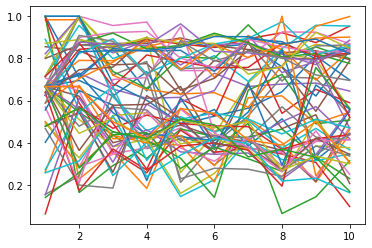

In [1]:
from functions_spinoza import plot_characters
from functions_spinoza import plot_wordsintersection
from functions_spinoza import plot_tfidf

plot_characters(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_voorreden', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_voorreden', r'Resultaten/TTP1693_TTP1694_characters_voorreden')
plot_wordsintersection(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_voorreden', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_voorreden', r'Resultaten/TTP1693_TTP1694_wordsintersection_voorreden')
plot_tfidf(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_voorreden', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_voorreden', r'Resultaten/TTP1693_TTP1694_tfidf_voorreden')

plot_characters(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H1', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H1', r'Resultaten/TTP1693_TTP1694_characters_H1')
plot_wordsintersection(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H1', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H1', r'Resultaten/TTP1693_TTP1694_wordsintersection_H1')
plot_tfidf(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H1', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H1', r'Resultaten/TTP1693_TTP1694_tfidf_H1')

plot_characters(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H2', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H2', r'Resultaten/TTP1693_TTP1694_characters_H2')
plot_wordsintersection(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H2', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H2', r'Resultaten/TTP1693_TTP1694_wordsintersection_H2')
plot_tfidf(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H2', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H2', r'Resultaten/TTP1693_TTP1694_tfidf_H2')

plot_characters(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H3', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H3', r'Resultaten/TTP1693_TTP1694_characters_H3')
plot_wordsintersection(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H3', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H3', r'Resultaten/TTP1693_TTP1694_wordsintersection_H3')
plot_tfidf(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H3', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H3', r'Resultaten/TTP1693_TTP1694_tfidf_H3')

plot_characters(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H4', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H4', r'Resultaten/TTP1693_TTP1694_characters_H4')
plot_wordsintersection(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H4', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H4', r'Resultaten/TTP1693_TTP1694_wordsintersection_H4')
plot_tfidf(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H4', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H4', r'Resultaten/TTP1693_TTP1694_tfidf_H4')

plot_characters(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H5', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H5', r'Resultaten/TTP1693_TTP1694_characters_H5')
plot_wordsintersection(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H5', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H5', r'Resultaten/TTP1693_TTP1694_wordsintersection_H5')
plot_tfidf(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H5', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H5', r'Resultaten/TTP1693_TTP1694_tfidf_H5')

plot_characters(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H6', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H6', r'Resultaten/TTP1693_TTP1694_characters_H6')
plot_wordsintersection(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H6', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H6', r'Resultaten/TTP1693_TTP1694_wordsintersection_H6')
plot_tfidf(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H6', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H6', r'Resultaten/TTP1693_TTP1694_tfidf_H6')

plot_characters(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H7', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H7', r'Resultaten/TTP1693_TTP1694_characters_H7')
plot_wordsintersection(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H7', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H7', r'Resultaten/TTP1693_TTP1694_wordsintersection_H7')
plot_tfidf(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H7', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H7', r'Resultaten/TTP1693_TTP1694_tfidf_H7')

plot_characters(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H8', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H8', r'Resultaten/TTP1693_TTP1694_characters_H8')
plot_wordsintersection(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H8', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H8', r'Resultaten/TTP1693_TTP1694_wordsintersection_H8')
plot_tfidf(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H8', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H8', r'Resultaten/TTP1693_TTP1694_tfidf_H8')

plot_characters(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H9', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H9', r'Resultaten/TTP1693_TTP1694_characters_H9')
plot_wordsintersection(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H9', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H9', r'Resultaten/TTP1693_TTP1694_wordsintersection_H9')
plot_tfidf(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H9', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H9', r'Resultaten/TTP1693_TTP1694_tfidf_H9')

plot_characters(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H10', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H10', r'Resultaten/TTP1693_TTP1694_characters_H10')
plot_wordsintersection(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H10', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H10', r'Resultaten/TTP1693_TTP1694_wordsintersection_H10')
plot_tfidf(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H10', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H10', r'Resultaten/TTP1693_TTP1694_tfidf_H10')

plot_characters(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H11', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H11', r'Resultaten/TTP1693_TTP1694_characters_H11')
plot_wordsintersection(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H11', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H11', r'Resultaten/TTP1693_TTP1694_wordsintersection_H11')
plot_tfidf(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H11', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H11', r'Resultaten/TTP1693_TTP1694_tfidf_H11')

plot_characters(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H12', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H12', r'Resultaten/TTP1693_TTP1694_characters_H12')
plot_wordsintersection(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H12', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H12', r'Resultaten/TTP1693_TTP1694_wordsintersection_H12')
plot_tfidf(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H12', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H12', r'Resultaten/TTP1693_TTP1694_tfidf_H12')

plot_characters(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H13', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H13', r'Resultaten/TTP1693_TTP1694_characters_H13')
plot_wordsintersection(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H13', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H13', r'Resultaten/TTP1693_TTP1694_wordsintersection_H13')
plot_tfidf(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H13', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H13', r'Resultaten/TTP1693_TTP1694_tfidf_H13')

plot_characters(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H14', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H14', r'Resultaten/TTP1693_TTP1694_characters_H14')
plot_wordsintersection(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H14', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H14', r'Resultaten/TTP1693_TTP1694_wordsintersection_H14')
plot_tfidf(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H14', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H14', r'Resultaten/TTP1693_TTP1694_tfidf_H14')

plot_characters(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H15', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H15', r'Resultaten/TTP1693_TTP1694_characters_H15')
plot_wordsintersection(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H15', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H15', r'Resultaten/TTP1693_TTP1694_wordsintersection_H15')
plot_tfidf(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H15', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H15', r'Resultaten/TTP1693_TTP1694_tfidf_H15')

plot_characters(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H16', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H16', r'Resultaten/TTP1693_TTP1694_characters_H16')
plot_wordsintersection(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H16', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H16', r'Resultaten/TTP1693_TTP1694_wordsintersection_H16')
plot_tfidf(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H16', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H16', r'Resultaten/TTP1693_TTP1694_tfidf_H16')

plot_characters(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H17', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H17', r'Resultaten/TTP1693_TTP1694_characters_H17')
plot_wordsintersection(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H17', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H17', r'Resultaten/TTP1693_TTP1694_wordsintersection_H17')
plot_tfidf(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H17', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H17', r'Resultaten/TTP1693_TTP1694_tfidf_H17')

plot_characters(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H18', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H18', r'Resultaten/TTP1693_TTP1694_characters_H18')
plot_wordsintersection(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H18', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H18', r'Resultaten/TTP1693_TTP1694_wordsintersection_H18')
plot_tfidf(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H18', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H18', r'Resultaten/TTP1693_TTP1694_tfidf_H18')

plot_characters(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H19', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H19', r'Resultaten/TTP1693_TTP1694_characters_H19')
plot_wordsintersection(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H19', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H19', r'Resultaten/TTP1693_TTP1694_wordsintersection_H19')
plot_tfidf(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H19', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H19', r'Resultaten/TTP1693_TTP1694_tfidf_H19')

plot_characters(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H20', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H20', r'Resultaten/TTP1693_TTP1694_characters_H20')
plot_wordsintersection(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H20', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H20', r'Resultaten/TTP1693_TTP1694_wordsintersection_H20')
plot_tfidf(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_eerste_tien_H20', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_eerste_tien_H20', r'Resultaten/TTP1693_TTP1694_tfidf_H20')




Na het controleren van de zinnenparen blijkt dat met letteroverlap, woordoverlap en tf-idf respectievelijk 65%, 98% en 97% van de zinnen correct aan elkaar gekoppeld worden. Zie voor het aantal correcte zinnen per hoofdstuk de excel bij documenten.

Woordoverlap werkt dus blijkbaar het beste om zinnen te koppelen. De gevonden 98% klopt echter alleen, wanneer we steeds 10 zinnen nemen. Bij het koppelen van zinnen over het gehele document zijn er voor elke zin meer mogelijke equivalent zinnen en is de kans op een fout gekoppelde zin ook groter. De functie plot_wordsintersection is nu uitgevoerd over het hele document en dezelfde eerste 10 zinnen van elk hoofdstuk zijn weer gecontroleerd.

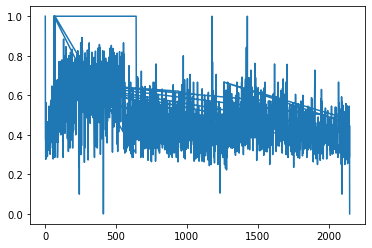

In [3]:
from functions_spinoza import plot_wordsintersection
plot_wordsintersection(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize', r'Resultaten/TTP1693_TTP1694_geheel')

Na controle blijkt slechts 75% van de zinnen correct gekoppeld te zijn. Zie weer de excel voor het aantal correct gekoppelde zinnen per hoofdstuk.

Het algoritme kan de zinnen dus beter koppelen, wanneer er minder zinnen zijn om uit te kiezen. Om dit te verwerken kan de tekst eerst opgesplitst worden in delen van meerdere zinnen. Deze delen kunnen dan met woordoverlap aan elkaar gekoppeld worden. Van elke zin in een deel is dan dus bekend dat de equivalente zin in het daaraan gekoppelde deel is. Binnen de gekoppelde delen kunnen de zinnen dan dus gepaard worden. Voor het maken van de paren van tekststukken zijn de functies windowpairs_wordsintersection() en windowpairs_tfidf(). Een andere manier is het opsplitsen van de tekst in hoofdstukken. Hier komen vier verschillende functies uit: plot_wordsintersection_chapters(), plot_tfidf_chapters(), plot_wordsintersection_windows_chapters() en plot_tfidf_windows_chapters. Het verdelen in hoofdstukken door plot_windows_chapters gebeurt alleen wanneer de hoofdtukken gescheiden zijn door '====='. Deze functie kan dus ook gebruikt worden voor het alleen opsplitsen in windows.

In [1]:
def windowpairs_wordsintersection(text1, text2):
    paired_windows = []
    list1 = text1.split('\n')
    list2 = text2.split('\n')
    windows1 = []
    windows2 = []
    count = 0
    while count < len(list1) - 20:
        windows1.append(list1[count:count+20])
        count += 20
    count = 0
    while count < len(list2) - 20:
        windows2.append(list2[count:count+20])
        count += 1
    for window1 in windows1:
        string1 = ' '.join(window1)
        matchlist = []
        for window2 in windows2:
            string2 = ' '.join(window2)
            matchlist.append(match_wordsintersection(string1, string2))
        pair = (window1, windows2[matchlist.index(max(matchlist))])
        paired_windows.append(pair)
    return paired_windows

def windowpairs_tfidf(text1, text2):
    paired_windows = []
    list1 = text1.split('\n')
    list2 = text2.split('\n')
    windows1 = []
    windows2 = []
    count = 0
    while count < len(list1) - 20:
        windows1.append(list1[count:count+20])
        count += 20
    count = 0
    while count < len(list2) - 20:
        windows2.append(list2[count:count+20])
        count += 1
    
    for window1 in windows1:
        string1 = ' '.join(window1)
        matchlist = []
        for window2 in windows2:
            string2 = ' '.join(window2)
            matchlist.append(match_tfidf(string1, string2))
        pair = (window1, windows2[matchlist.index(max(matchlist))])
        paired_windows.append(pair)
    return paired_windows


def plot_wordsintersection_windows_chapters(path1, path2, path3):
    import codecs
    import matplotlib.pyplot
    file1 = codecs.open(path1, 'r', 'utf-8')
    doc1 = file1.read()
    file1.close()
    file2 = codecs.open(path2, 'r', 'utf-8')
    doc2 = file2.read()
    file2.close()
    doc1 = doc1.split('=====')
    doc2 = doc2.split('=====')
    x_place = []
    y_match = []
    pairs = []
    for chapter in doc1:
        text1 = chapter
        text2 = doc2[doc1.index(chapter)]
        window_pairs = windowpairs_wordsintersection(text1, text2)
        for pair in window_pairs:
            window1, window2 = pair
            window1 = '\n'.join(window1)
            window2 = '\n'.join(window2)
            pairs += pairs_wordsintersection(window1, window2)
        for pair in pairs:
            x_place.append(pairs.index(pair)+1)
            string1, string2 = pair
            y_match.append(match_wordsintersection(string1, string2))
    zinnen_paired = ""
    for element in pairs:
        zin1, zin2 = element
        zinnen_paired += str(pairs.index(element) + 1) + '\n\n' + zin1 + "\n" + zin2 + "\n" + str(y_match[pairs.index(element)]) + '\n\n=======================================================\n'
    file3 = codecs.open(path3, 'w', 'utf-8')
    file3.write(zinnen_paired)
    file3.close()
    print(matplotlib.pyplot.plot(x_place, y_match))
    



def plot_tfidf_windows_chapters(path1, path2, path3):
    import codecs
    import matplotlib.pyplot
    file1 = codecs.open(path1, 'r', 'utf-8')
    doc1 = file1.read()
    file1.close()
    file2 = codecs.open(path2, 'r', 'utf-8')
    doc2 = file2.read()
    file2.close()
    doc1 = doc1.split('=====')
    doc2 = doc2.split('=====')
    x_place = []
    y_match = []
    pairs = []
    for chapter in doc1:
        text1 = chapter
        text2 = doc2[doc1.index(chapter)]
        window_pairs = windowpairs_tfidf(text1, text2)
        for pair in window_pairs:
            window1, window2 = pair
            window1 = '\n'.join(window1)
            window2 = '\n'.join(window2)
            pairs += pairs_tfidf(window1, window2)
        for pair in pairs:
            x_place.append(pairs.index(pair)+1)
            string1, string2 = pair
            y_match.append(match_tfidf(string1, string2))
    zinnen_paired = ""
    for element in pairs:
        zin1, zin2 = element
        zinnen_paired += str(pairs.index(element) + 1) + '\n\n' + zin1 + "\n" + zin2 + "\n" + str(y_match[pairs.index(element)]) + '\n\n=======================================================\n'
    file3 = codecs.open(path3, 'w', 'utf-8')
    file3.write(zinnen_paired)
    file3.close()
    print(matplotlib.pyplot.plot(x_place, y_match))
    
    
def plot_wordsintersection_chapters(path1, path2, path3):
    import codecs
    import matplotlib.pyplot
    file1 = codecs.open(path1, 'r', 'utf-8')
    doc1 = file1.read()
    file1.close()
    file2 = codecs.open(path2, 'r', 'utf-8')
    doc2 = file2.read()
    file2.close()
    doc1 = doc1.split('=====')
    doc2 = doc2.split('=====')
    x_place = []
    y_match = []
    pairs = []
    for chapter in doc1:
        text1 = chapter
        text2 = doc2[doc1.index(chapter)]
        pairs += pairs_wordsintersection(text1, text2)
    for pair in pairs:
        x_place.append(pairs.index(pair)+1)
        string1, string2 = pair
        y_match.append(match_wordsintersection(string1, string2))
    zinnen_paired = ""
    for element in pairs:
        zin1, zin2 = element
        zinnen_paired += str(pairs.index(element) + 1) + '\n\n' + zin1 + "\n" + zin2 + "\n" + str(y_match[pairs.index(element)]) + '\n\n=======================================================\n'
    file3 = codecs.open(path3, 'w', 'utf-8')
    file3.write(zinnen_paired)
    file3.close()
    print(matplotlib.pyplot.plot(x_place, y_match))
    
def plot_tfidf_chapters(path1, path2, path3):
    import codecs
    import matplotlib.pyplot
    file1 = codecs.open(path1, 'r', 'utf-8')
    doc1 = file1.read()
    file1.close()
    file2 = codecs.open(path2, 'r', 'utf-8')
    doc2 = file2.read()
    file2.close()
    doc1 = doc1.split('=====')
    doc2 = doc2.split('=====')
    x_place = []
    y_match = []
    pairs = []
    for chapter in doc1:
        text1 = chapter
        text2 = doc2[doc1.index(chapter)]
        pairs += pairs_tfidf(text1, text2)
    for pair in pairs:
        x_place.append(pairs.index(pair)+1)
        string1, string2 = pair
        y_match.append(match_tfidf(string1, string2))
    zinnen_paired = ""
    for element in pairs:
        zin1, zin2 = element
        zinnen_paired += str(pairs.index(element) + 1) + '\n\n' + zin1 + "\n" + zin2 + "\n" + str(y_match[pairs.index(element)]) + '\n\n=======================================================\n'
    file3 = codecs.open(path3, 'w', 'utf-8')
    file3.write(zinnen_paired)
    file3.close()
    print(matplotlib.pyplot.plot(x_place, y_match))

Voor deze twee manieren en de combinatie van de twee heb ik het algoritme weer uitgevoerd en van elk hoofdtuk de eerste tien zinnen gecontroleerd.

In [ ]:
import functions_spinoza
functions_spinoza.plot_wordsintersection_windows_chapters(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize', r'Resultaten/TTP1693_TTP1694_wordsintersection_windows')
functions_spinoza.plot_tfidf_windows_chapters(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize', r'Resultaten/TTP1693_TTP1694_tfidf_windows')
functions_spinoza.plot_wordsintersection_windows_chapters(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_hoofdstukgesplitst', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_hoofdstukgesplitst', r'Resultaten/TTP1693_TTP1694_wordsintersection_windows_chapters')
functions_spinoza.plot_tfidf_windows_chapters(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_hoofdstukgesplitst', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_hoofdstukgesplitst', r'Resultaten/TTP1693_TTP1694_tfidf_windows_chapters')
functions_spinoza.plot_wordsintersection_chapters(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_hoofdstukgesplitst', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_hoofdstukgesplitst', r'Resultaten/TTP1693_TTP1694_wordsintersection_chapters')
functions_spinoza.plot_tfidf_chapters(r'Voorbewerkte_documenten/TTP1693_no_markup_utf8_nltktokenize_hoofdstukgesplitst', r'Voorbewerkte_documenten/TTP1694_no_markup_utf8_nltktokenize_hoofdstukgesplitst', r'Resultaten/TTP1693_TTP1694_tfidf_chapters')

Na controle is het volgende resultaat verkregen:
Windows:
    wordsintersection: 86%
    tfidf: 85%
Chapters:
    wordsintersection: 91%
    tfidf: 93%
Windows en chapters:
    wordsintersection: 89%
    tfidf: 88%

Zie voor de uitgebreide resultaten weer de excel.
Per hoofdtuk splitsen met tfidf werkt dus het best voor deze tekst. Wanneer er echter geen verdeling in hoofdstukken is of wanneer de hoofdstukken erg lang zijn, werkt windows ook goed. Daarnaast is het verschil tussen tfidf en wordsintersection niet zo groot dat geconcludeerd kan worden dat tfidf beter is. Op basis van de resultaten van plot_tfidf_chapters() is een grafiek gemaakt in het excelbestand. Hierin is te zien dat hoofdstuk 1 t/m 4 duidelijk meer overeenkomst vertonen dan de rest van de tekst.